# Проект: Обучение с учителем: качество модели

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений. «В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования.

Необходимо разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

Подход к решению задачи:

Для выполнения задачи необходимо пройти следуюшие этапы:

1. Нужно промаркировать уровень финансовой активности постоянных покупателей. В компании принято выделять два уровня активности: «снизилась», если клиент стал покупать меньше товаров, и «прежний уровень».

2. Нужно собрать данные по клиентам по следующим группам:

- Признаки, которые описывают коммуникацию сотрудников компании с клиентом.
- Признаки, которые описывают продуктовое поведение покупателя. Например, какие товары покупает и как часто.
- Признаки, которые описывают покупательское поведение клиента. Например, сколько тратил в магазине.
- Признаки, которые описывают поведение покупателя на сайте. Например, как много страниц просматривает и сколько времени проводит на сайте.
- Нужно построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.

В исследование нужно включить дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца.

3. Используя данные модели и данные о прибыльности клиентов, нужно выделить сегменты покупателей и разработать для них персонализированные предложения.

**Цель исследования:** сегментация покупателей и разработка персонализированных предложений для них.

**Описание данных**

*market_file.csv*  
Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.

- id — номер покупателя в корпоративной базе данных.
- Покупательская активность — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
- Тип сервиса — уровень сервиса, например «премиум» и «стандарт».
- Разрешить сообщать — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
- Маркет_актив_6_мес — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
- Маркет_актив_тек_мес — количество маркетинговых коммуникаций в текущем месяце.
- Длительность — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
- Акционные_покупки — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
- Популярная_категория — самая популярная категория товаров у покупателя за последние 6 месяцев.
- Средний_просмотр_категорий_за_визит — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
- Неоплаченные_продукты_штук_квартал — общее число неоплаченных товаров в корзине за последние 3 месяца.
- Ошибка_сервиса — число сбоев, которые коснулись покупателя во время посещения сайта.
- Страниц_за_визит — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.


*market_money.csv*  
Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.

- id — номер покупателя в корпоративной базе данных.
- Период — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
- Выручка — сумма выручки за период.


*market_time.csv*  
Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.

- id — номер покупателя в корпоративной базе данных.
- Период — название периода, во время которого зафиксировано общее время.
- минут — значение времени, проведённого на сайте, в минутах.


*money.csv*  
Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.

- id — номер покупателя в корпоративной базе данных.
- Прибыль — значение прибыли.

In [3]:
conda install scklearn==1.2 #после этого необходимо рестартнуть ядро (Kernel->Restart the kernel)

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Note: you may need to restart the kernel to use updated packages.


In [4]:
!pip install phik -q
!pip install shap -q
!pip install imblearn -q

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

from phik import phik_matrix
from sklearn.model_selection import train_test_split

from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE


# загружаем классы для подготовки данных
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.compose import ColumnTransformer

# загружаем класс для работы с пропусками
from sklearn.impute import SimpleImputer

# загружаем функцию для работы с метриками
from sklearn.metrics import roc_auc_score, fbeta_score, precision_score, recall_score, make_scorer

# импортируем класс GridSearchCV
from sklearn.model_selection import GridSearchCV

# загружаем нужные модели
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

import shap
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

In [6]:
RANDOM_STATE = 42
TEST_SIZE = 0.25

## Выгрузка данных

In [7]:
def get_var_name(var): #функция для получения имени переменной
    globals_dict = globals()
    return [name for name, value in globals_dict.items() if value is var][0]

def describe_dataset(dataset): #функция для описания данных в датасете
    display(dataset.head(5))
    print(f'Общие сведения о датасете {get_var_name(dataset)}')
    print('---------------------------------------------------------------------------')
    print(dataset.info(), end="\n\n")
    print(f'Сатистические данные о датасете {get_var_name(dataset)}')
    print('---------------------------------------------------------------------------')
    print(dataset.describe(), end="\n\n")
    print(f'Уникальные значения в столбцах датасете {get_var_name(dataset)}')
    print('---------------------------------------------------------------------------')
    for col in dataset.columns:
        if dataset[col].dtype == 'object':
            print(f'{col}: {len(dataset[col].unique())} уникальных значений')
            if len(dataset[col].unique()) < 5:
                print(dataset[col].value_counts(), end="\n\n")
            else:
                print(dataset[col].value_counts().head(), end="\n\n")
            
    print(f'Пропуски в датасете {get_var_name(dataset)}')
    print('---------------------------------------------------------------------------')
    display(pd.DataFrame([round(dataset.isna().mean()*100), dataset.isna().sum()]).T.
    sort_values(by=0, ascending=False).
    rename(columns={0: 'Процент пропусков, %', 1: 'Количество пропусков'}).
    style.format("{:,.2f}").
    background_gradient('coolwarm').
    set_properties(**{'text-align': 'center'}))
    print(f'Явные дубликаты в датасете {get_var_name(dataset)}')
    print('---------------------------------------------------------------------------')
    print(f'Количество строк-дубликатов {dataset.duplicated().sum()} ({round(dataset.duplicated().mean()*100)}%)')

In [8]:
market_file = pd.read_csv('/datasets/market_file.csv')
market_money = pd.read_csv('/datasets/market_money.csv')
market_time = pd.read_csv('/datasets/market_time.csv')
money = pd.read_csv('/datasets/money.csv', sep=';')

Исследуем каждый датасет по отдельности

In [9]:
market_file.head()

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


In [10]:
market_money.head()

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


In [11]:
market_time.head()

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


In [12]:
money.head()

,id,Прибыль
0,215348,"0,98"
1,215349,"4,16"
2,215350,"3,13"
3,215351,"4,87"
4,215352,"4,21"


Данные соответствуют завяленному описанию

Переведём все буквы в нижний регистр для удобства работы. Для этого напишем функцию

In [13]:
def col_renamer(col_names):
    return [col.lower().replace(' ', '_') for col in col_names]

In [14]:
market_file.columns = col_renamer(market_file.columns)
market_money.columns = col_renamer(market_money.columns)
market_time.columns = col_renamer(market_time.columns)
money.columns = col_renamer(money.columns)

In [15]:
print(market_file.columns)
print(market_money.columns)
print(market_time.columns)
print(money.columns)

Index(['id', 'покупательская_активность', 'тип_сервиса', 'разрешить_сообщать',
       'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
       'акционные_покупки', 'популярная_категория',
       'средний_просмотр_категорий_за_визит',
       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит'],
      dtype='object')
Index(['id', 'период', 'выручка'], dtype='object')
Index(['id', 'период', 'минут'], dtype='object')
Index(['id', 'прибыль'], dtype='object')


## Предобработка данных

### Датасет market_file

In [16]:
describe_dataset(market_file)

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


Общие сведения о датасете market_file
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   покупательская_активность            1300 non-null   object 
 2   тип_сервиса                          1300 non-null   object 
 3   разрешить_сообщать                   1300 non-null   object 
 4   маркет_актив_6_мес                   1300 non-null   float64
 5   маркет_актив_тек_мес                 1300 non-null   int64  
 6   длительность                         1300 non-null   int64  
 7   акционные_покупки                    1300 non-null   float64
 8   популярная_категория                 1300 non-null   object 
 9   средний_просмотр_категорий_за_визит  1300 non-nu

,"Процент пропусков, %",Количество пропусков
id,0.00,0.00
покупательская_активность,0.00,0.00
тип_сервиса,0.00,0.00
разрешить_сообщать,0.00,0.00
маркет_актив_6_мес,0.00,0.00
маркет_актив_тек_мес,0.00,0.00
длительность,0.00,0.00
акционные_покупки,0.00,0.00
популярная_категория,0.00,0.00
средний_просмотр_категорий_за_визит,0.00,0.00


Явные дубликаты в датасете market_file
---------------------------------------------------------------------------
Количество строк-дубликатов 0 (0%)


Видим, что типы данных в датасете верны. Пропусков и дубликатов в датасете нет. Однако видим, что в признаке "тип_сервиса" есть "стандартт", что является явной опечаткой. Исправим это

In [17]:
market_file['тип_сервиса'] = market_file['тип_сервиса'].replace('стандартт', 'стандарт')
print(market_file['тип_сервиса'].unique())

['премиум' 'стандарт']


Проверим ещё раз на дубликаты

In [18]:
market_file.duplicated().sum()

0

Предварительная подготовка данных в первом датасете завершена

### Датасет market_money

In [19]:
describe_dataset(market_money)

,id,период,выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


Общие сведения о датасете market_money
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   период   3900 non-null   object 
 2   выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB
None

Сатистические данные о датасете market_money
---------------------------------------------------------------------------
                  id        выручка
count    3900.000000    3900.000000
mean   215997.500000    5025.696051
std       375.325686    1777.704104
min    215348.000000       0.000000
25%    215672.750000    4590.150000
50%    215997.500000    4957.500000
75%    216322.250000    5363.000000
max    216647.000000  106862.200000

Уникальные значения в столбцах датасете market_money
---------------------

,"Процент пропусков, %",Количество пропусков
id,0.00,0.00
период,0.00,0.00
выручка,0.00,0.00


Явные дубликаты в датасете market_money
---------------------------------------------------------------------------
Количество строк-дубликатов 0 (0%)


В столбце нет явных, неявных дубликатов, а также нет пропусков. Типы данных верны. Датасет можно брать в работу

### Датасет market_time

In [20]:
describe_dataset(market_time)

,id,период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


Общие сведения о датасете market_time
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB
None

Сатистические данные о датасете market_time
---------------------------------------------------------------------------
                  id        минут
count    2600.000000  2600.000000
mean   215997.500000    13.336154
std       375.349754     4.080198
min    215348.000000     4.000000
25%    215672.750000    10.000000
50%    215997.500000    13.000000
75%    216322.250000    16.000000
max    216647.000000    23.000000

Уникальные значения в столбцах датасете market_time
----------------------------------------------------------------

,"Процент пропусков, %",Количество пропусков
id,0.00,0.00
период,0.00,0.00
минут,0.00,0.00


Явные дубликаты в датасете market_time
---------------------------------------------------------------------------
Количество строк-дубликатов 0 (0%)


Явных и неявных дубликатов в датасете нет. Пропусков тоже нет. Типы данных верны. Для однородности исправим опечатку в "предыдущий месяц"

In [21]:
market_time['период'] = market_time['период'].replace('предыдцщий_месяц', 'предыдущий_месяц')
print(market_time['период'].unique())

['текущий_месяц' 'предыдущий_месяц']


Датасет предобработан

### Датасет money

In [22]:
describe_dataset(money)

,id,прибыль
0,215348,"0,98"
1,215349,"4,16"
2,215350,"3,13"
3,215351,"4,87"
4,215352,"4,21"


Общие сведения о датасете money
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       1300 non-null   int64 
 1   прибыль  1300 non-null   object
dtypes: int64(1), object(1)
memory usage: 20.4+ KB
None

Сатистические данные о датасете money
---------------------------------------------------------------------------
                  id
count    1300.000000
mean   215997.500000
std       375.421985
min    215348.000000
25%    215672.750000
50%    215997.500000
75%    216322.250000
max    216647.000000

Уникальные значения в столбцах датасете money
---------------------------------------------------------------------------
прибыль: 400 уникальных значений
3,89    11
4,28     9
5,1      9
4,18     9
3,74     8
Name: прибыль, dtype: int64

Пропуски в датасете money
------------

,"Процент пропусков, %",Количество пропусков
id,0.00,0.00
прибыль,0.00,0.00


Явные дубликаты в датасете money
---------------------------------------------------------------------------
Количество строк-дубликатов 0 (0%)


В столбце "прибыль" указан неверный формат, что связано с неверным разделителем между дробной и целой частями. Заменим разделитель и изменим тип данных на верный

In [23]:
money['прибыль'] = money['прибыль'].str.replace(',', '.').astype('float')

In [24]:
describe_dataset(money)

,id,прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


Общие сведения о датасете money
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB
None

Сатистические данные о датасете money
---------------------------------------------------------------------------
                  id      прибыль
count    1300.000000  1300.000000
mean   215997.500000     3.996631
std       375.421985     1.013722
min    215348.000000     0.860000
25%    215672.750000     3.300000
50%    215997.500000     4.045000
75%    216322.250000     4.670000
max    216647.000000     7.430000

Уникальные значения в столбцах датасете money
---------------------------------------------------------------------------
Пропуски в датасете money
--------

,"Процент пропусков, %",Количество пропусков
id,0.00,0.00
прибыль,0.00,0.00


Явные дубликаты в датасете money
---------------------------------------------------------------------------
Количество строк-дубликатов 0 (0%)


Датасет предобработан

**Вывод**: данные из всех четырех наборов предобработаны: 
- в датасете market_file исправлены неявные дубликаты (замена "стандартт" на "стандарт"), что, скорее всего, является ошибкой при заполнении данных. Необходимо это проверить
- в датасете money исправлен тип данных в столбце "прибыль". Необходимо изменить процесс выгрузки данных, чтобы такого не повторялось

## Исследовательский анализ данных

In [77]:
def num_feature_plot(feature, title, bins=50):
    """
    Строит распределение и диаграмму размаха для количественных признаков
    """
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
    fig.suptitle(f"{title}", fontsize=16)
    ax[0].hist(feature, bins=bins, color='b', edgecolor='black')
    ax[0].set_title(f'Гистограмма для признака {title}', fontsize=15)
    ax[0].set_xlabel(title)
    ax[0].set_ylabel('Частота встречаемости')
    
    ax[1].boxplot(feature, vert=False, widths=10, patch_artist=True, boxprops={
    'color': 'black',       # Цвет контура
    'facecolor': 'blue', # Цвет заливки
    'linewidth': 1,       # Ширина контура
    'linestyle': '-',       # Тип линии (например, '-', '--', ':')
    'alpha': 0.7          # Прозрачность
}
                 )
    ax[1].set_title(f'Ящик с усами для признака {title}', fontsize=15)
    ax[1].set_xlabel(f'{title}')
    plt.show()
    
def cat_feature_plot(feature, title):
    """
    Строит столбчатую диаграмму распределения для категориальных данных
    """
    counts = feature.value_counts()
    fig, ax = plt.subplots(figsize=(8, 6)) 
    ax.pie(feature.value_counts(), 
          labels=feature.unique(), 
          autopct=lambda p: f'{p * sum(feature.value_counts()) / 100:.0f} ({p:.1f}%)')
    ax.set_title(f'Круговая диаграмма признака {title}', fontsize=14, fontweight='bold')
    plt.show()

    
def analyze_col(column, feature_name, bins=50):
    if column.dtype == 'object':
        cat_feature_plot(column, feature_name)
    else:
        print(column.describe())
        num_feature_plot(column, feature_name, bins=bins)

### Датасет market_file

In [78]:
market_file.columns

Index(['id', 'покупательская_активность', 'тип_сервиса', 'разрешить_сообщать',
       'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
       'акционные_покупки', 'популярная_категория',
       'средний_просмотр_категорий_за_визит',
       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит'],
      dtype='object')

Рассмотрим признаки по очереди

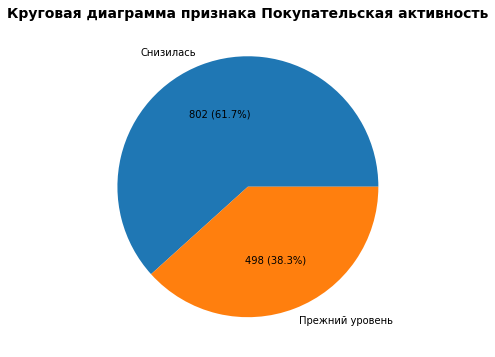

In [79]:
analyze_col(market_file['покупательская_активность'], 'Покупательская активность')

Видим, что в большей части случаев покупательская активность снизилась. Присутствует небольшой дисбаланс классов. Так как этот признак целевой, возможно, стоит подумать о сэмплинге

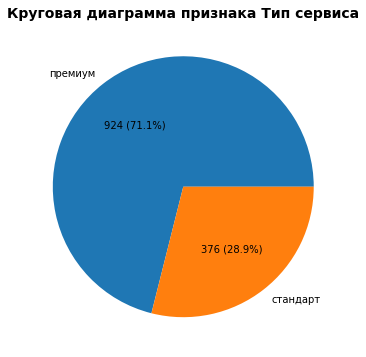

In [80]:
analyze_col(market_file['тип_сервиса'], 'Тип сервиса')

Чаще всего пользователи используют премиум подписку на сервис

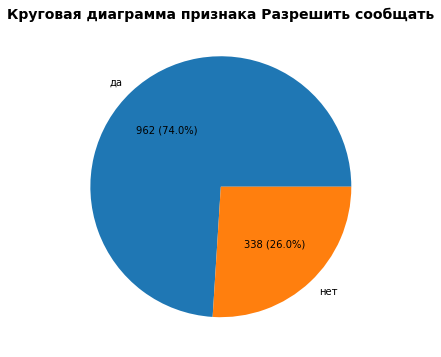

In [81]:
analyze_col(market_file['разрешить_сообщать'], 'Разрешить сообщать')

Видим, что пользователи готовы получать сообщения о товаре, это может говорить о лояльности к сервису. Или к желанию получать товары по акциям и спецпредложениям

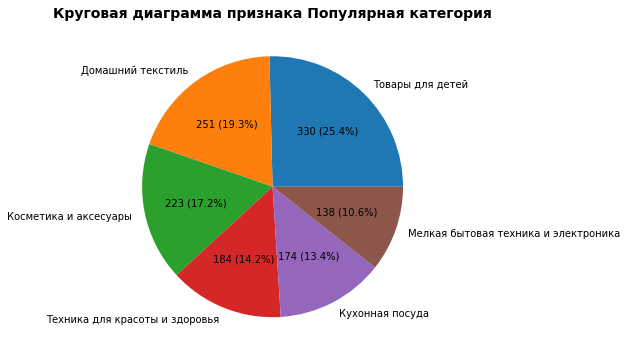

In [82]:
analyze_col(market_file['популярная_категория'], 'Популярная категория')

Категории находятся примерно в равных пропорциях - нет больших перевесов. С другой стороны, для четверти пользователей наиболее популярной категорией являются товары для детей. Возможно, чаще всего сервисом пользуются молодые родители, так как не успевают сами сходить за покупками. 

Перейдём к числовым признакам

count    1300.000000
mean        4.253769
std         1.014814
min         0.900000
25%         3.700000
50%         4.200000
75%         4.900000
max         6.600000
Name: маркет_актив_6_мес, dtype: float64


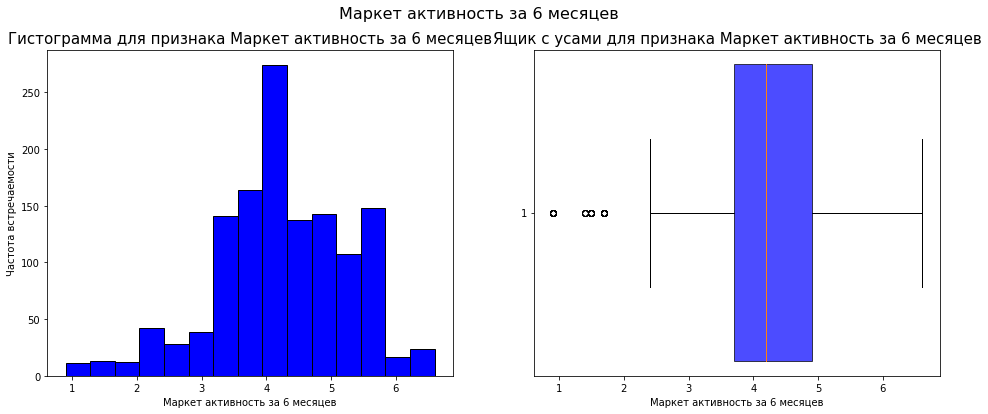

In [83]:
analyze_col(market_file['маркет_актив_6_мес'], 'Маркет активность за 6 месяцев', bins=15)

Распределение условно можно считать нормальным. Видно, что правая часть гораздо больше левой. То есть ежемесячно с пользователеми взаимодействуют относительно часто. Есть выбросы в левой части, но их не так много.

count    1300.000000
mean        4.011538
std         0.696868
min         3.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: маркет_актив_тек_мес, dtype: float64


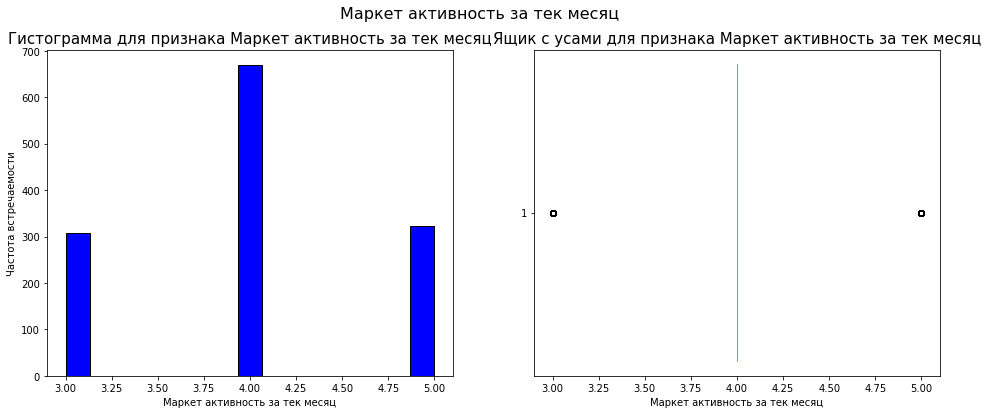

In [84]:
analyze_col(market_file['маркет_актив_тек_мес'], 'Маркет активность за тек месяц', bins=15)

Признак дискретный, поэтому графики достаточно необычно выглядят. Попробуем построить круговую диаграмму для анализа

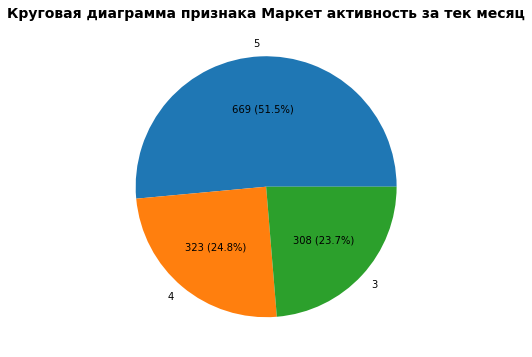

In [85]:
analyze_col(market_file['маркет_актив_тек_мес'].astype('object'), 'Маркет активность за тек месяц', bins=15)

Более чем с половиной пользователей взаимодействие за этот месяц происходило 5 раз. Это больше, чем среднемесячное среднее за прошлые полгода. Можно предположить, что отдел маркетинга плотно взялся за работу с клиентами, но теперь старается брать больший охват.

count    1300.000000
mean      601.898462
std       249.856289
min       110.000000
25%       405.500000
50%       606.000000
75%       806.000000
max      1079.000000
Name: длительность, dtype: float64


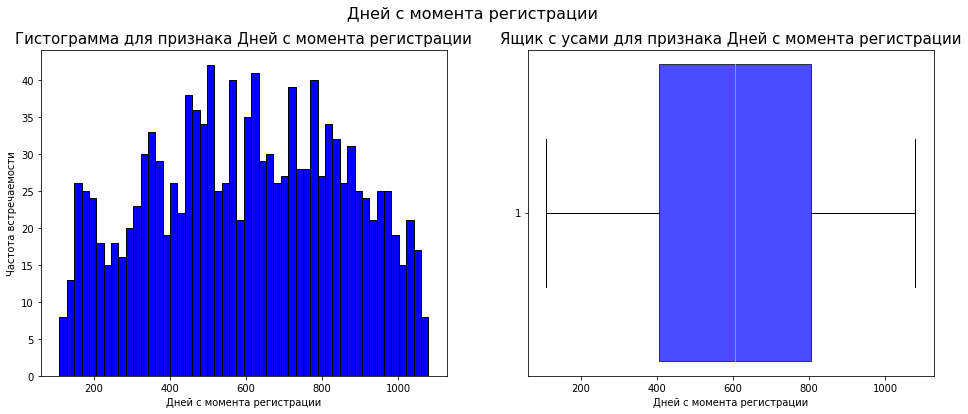

In [86]:
analyze_col(market_file['длительность'], 'Дней с момента регистрации', bins=50)

Распределение не очень похоже на норальное, но можно принять, что похоже. Выбросов у этой величины нет, возможно, сервис не так долго существует для появления выбросов. Основная часть пользователей в сервисе от 400 до 900 дней. Солидный срок, но новых пользователей меньше, сравнимо с началом работы сервиса (за исключением пика в районе 200 дней). 

count    1300.000000
mean        0.319808
std         0.249843
min         0.000000
25%         0.170000
50%         0.240000
75%         0.300000
max         0.990000
Name: акционные_покупки, dtype: float64


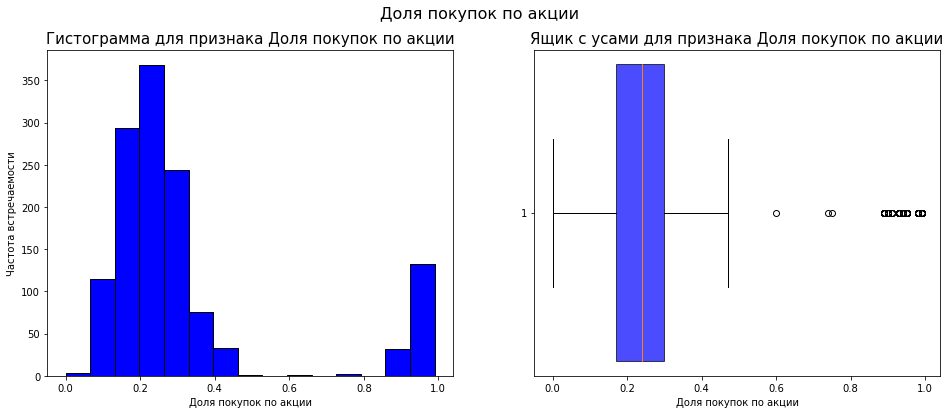

In [87]:
analyze_col(market_file['акционные_покупки'], 'Доля покупок по акции', bins=15)

Можно предположить, что распредление бимодальное. Видно, что есть выбросы справа. Значит, есть пользователи, которые приходят в сервис только за покупками по скидке. 

count    1300.00000
mean        3.27000
std         1.35535
min         1.00000
25%         2.00000
50%         3.00000
75%         4.00000
max         6.00000
Name: средний_просмотр_категорий_за_визит, dtype: float64


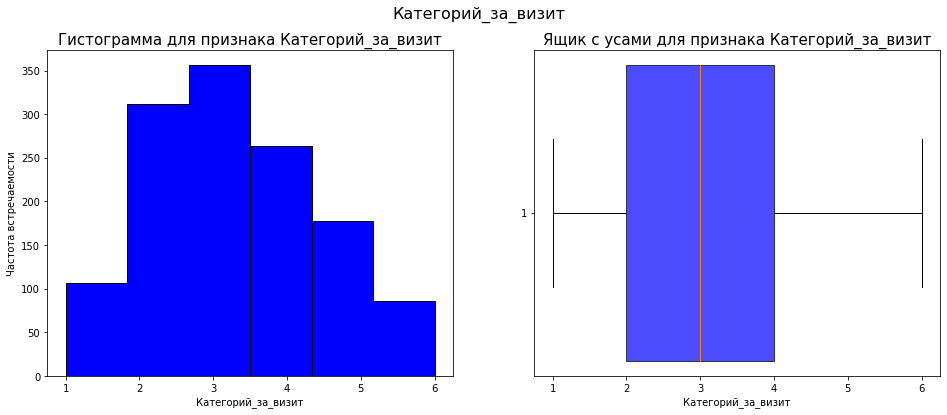

In [88]:
analyze_col(market_file['средний_просмотр_категорий_за_визит'], 'Категорий_за_визит', bins=6)

Признак опять дискретный, но условно можно считать, что он распределен нормально. Выбросов нет. Чаще всего пользователи просматривают 3 категории. Редко кто просматривают 5-6 категорий. Видимо, чаще всего пользователи идут за чем-то конкретным, но не прочь заглянуть в соседние категории.

count    1300.000000
mean        2.840000
std         1.971451
min         0.000000
25%         1.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: неоплаченные_продукты_штук_квартал, dtype: float64


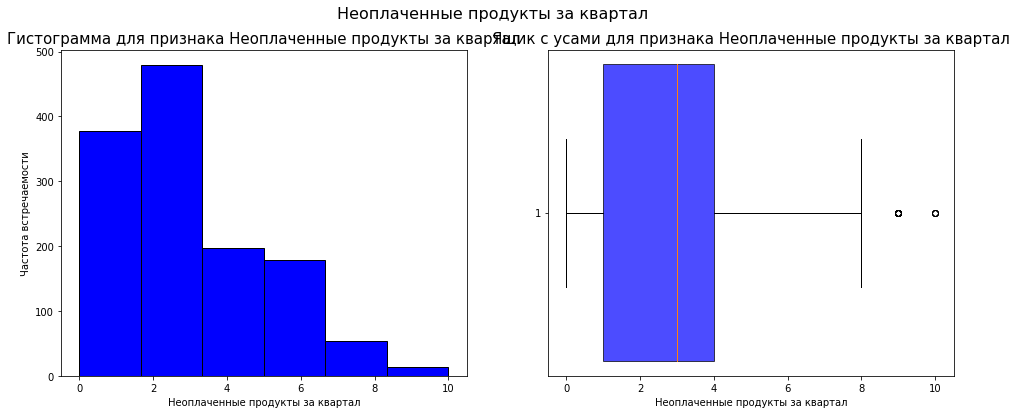

In [89]:
analyze_col(market_file['неоплаченные_продукты_штук_квартал'], 'Неоплаченные продукты за квартал', bins=6)

Не так много пользователи оставляют продукты неоплаченными. Но есть выбросы в виде любителей пособирать корзину. Возможно, боятся потерять то, о чём так мечают. Стоит подумать над тем, как сподвигнуть их выкупить корзину.

count    1300.000000
mean        4.185385
std         1.955298
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max         9.000000
Name: ошибка_сервиса, dtype: float64


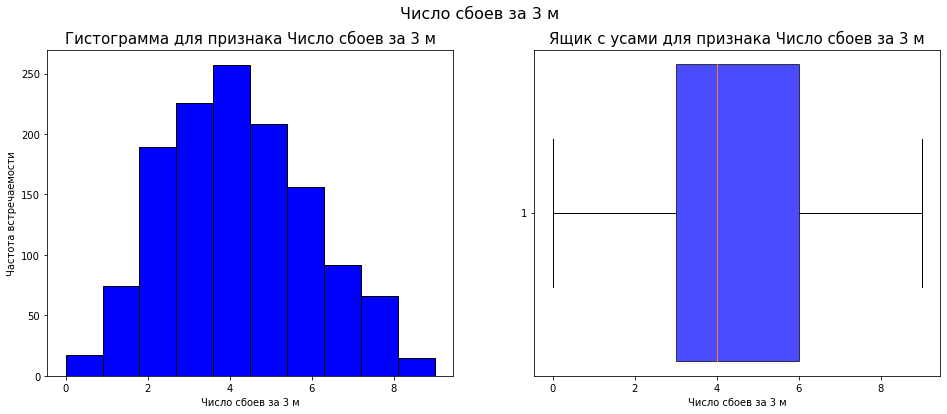

In [90]:
analyze_col(market_file['ошибка_сервиса'], 'Число сбоев за 3 м', bins=10) 

Распределение дискретно, форма близка к нормальной. Сбоев в работе не так много, но стоит поработать над устойчивостью.

count    1300.000000
mean        8.176923
std         3.978126
min         1.000000
25%         5.000000
50%         8.000000
75%        11.000000
max        20.000000
Name: страниц_за_визит, dtype: float64


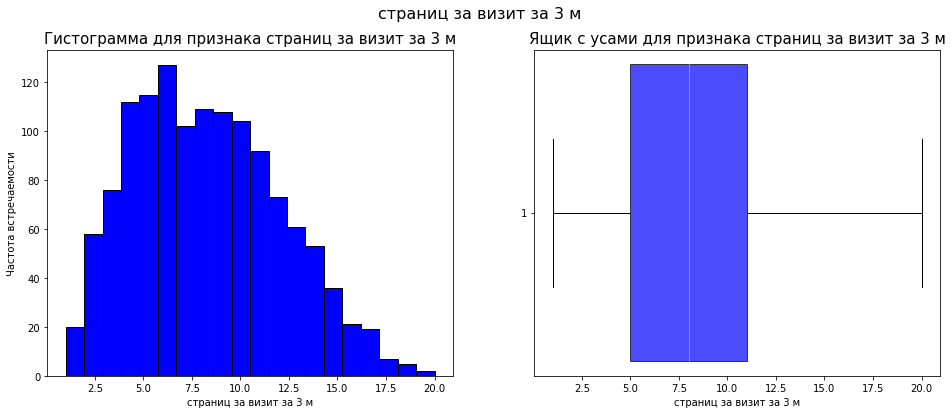

In [91]:
analyze_col(market_file['страниц_за_визит'], 'страниц за визит за 3 м', bins=20)  

Распределение дискретно. Похоже на распределение Пуассона. Медиана равна 8 страницам за визит. Чаще всего пользователи всё-таки приходят за чем-то конкретным, редко кто посещает много страниц в поисках нужного. Либо пользователи знают, за чем иду, либо так хорошо работает система рекомендаций. 

### Датасет market_money

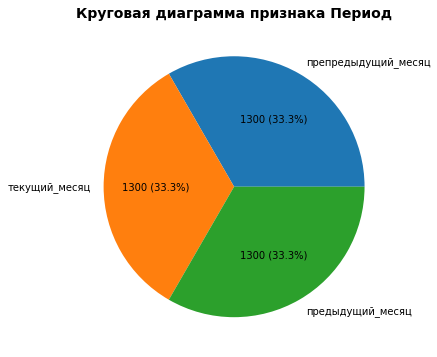

In [92]:
analyze_col(market_money['период'], 'Период')

Очевидно, что данные хорошо подготовлены и для всех 1300 пользователей за все три месяца есть данные. Рассмотрим выручкку по месяцам

count    1300.000000
mean     4825.206923
std       405.979663
min         0.000000
25%      4583.000000
50%      4809.000000
75%      5053.500000
max      5663.000000
Name: выручка, dtype: float64


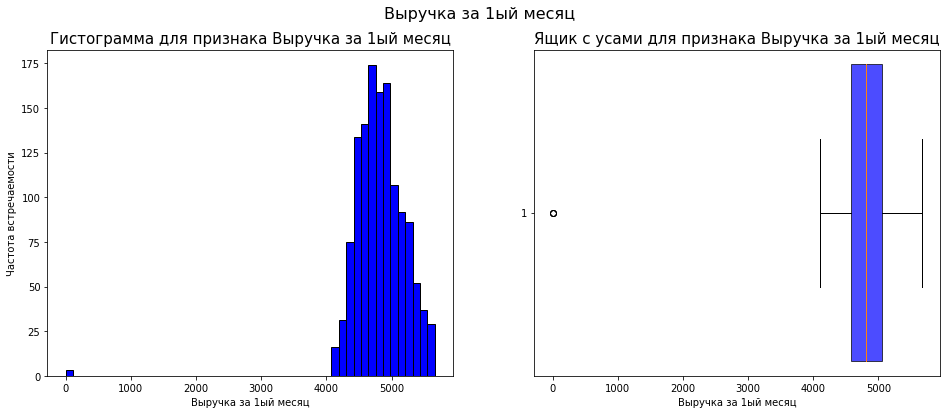

In [93]:
analyze_col(market_money.query('период == "препредыдущий_месяц"')['выручка'], 'Выручка за 1ый месяц')

Есть выброс из трёх клиентов. В остальном распределение близко к нормальному. Рассмотрим детальнее

count    1297.000000
mean     4836.367772
std       333.438742
min      4098.000000
25%      4585.000000
50%      4812.000000
75%      5055.000000
max      5663.000000
Name: выручка, dtype: float64


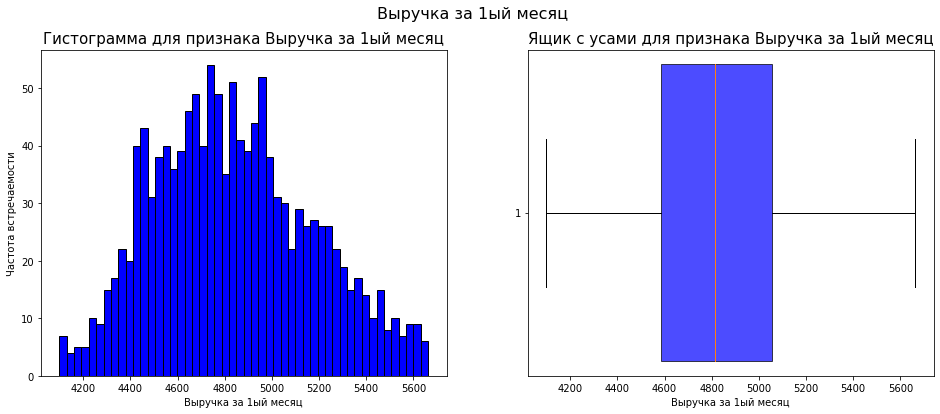

In [94]:
analyze_col(market_money.query('период == "препредыдущий_месяц" & выручка > 1000')['выручка'], 'Выручка за 1ый месяц')

count    1300.000000
mean     4936.920385
std       739.597997
min         0.000000
25%      4496.750000
50%      5005.000000
75%      5405.625000
max      6869.500000
Name: выручка, dtype: float64


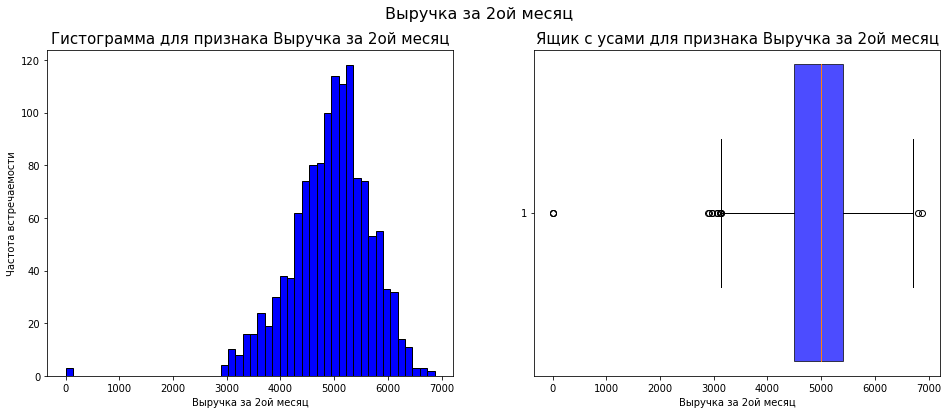

In [95]:
analyze_col(market_money.query('период == "предыдущий_месяц"')['выручка'], 'Выручка за 2ой месяц')

И снова есть выбросы в районе нуля (тоже три пользователя). Также появились выбросы по краям основного распределения. 

count    1297.000000
mean     4948.339630
std       701.228571
min      2890.000000
25%      4498.500000
50%      5005.500000
75%      5409.000000
max      6869.500000
Name: выручка, dtype: float64


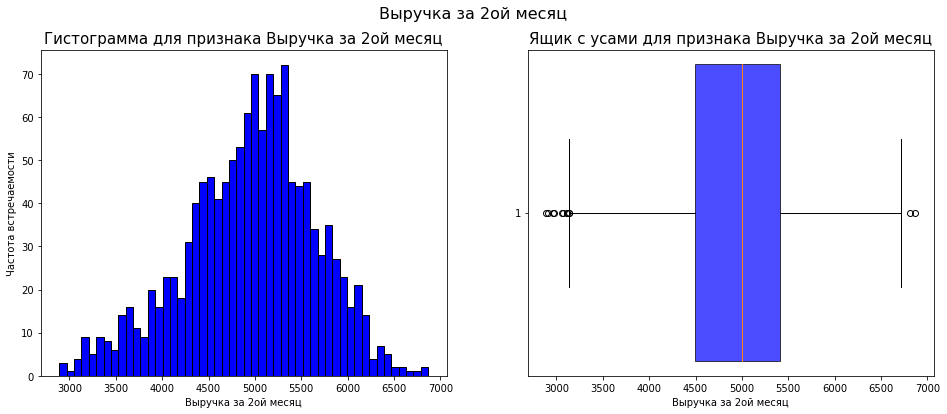

In [96]:
analyze_col(market_money.query('период == "предыдущий_месяц" & выручка > 1000')['выручка'], 'Выручка за 2ой месяц')

count      1300.000000
mean       5314.960846
std        2939.708156
min        2758.700000
25%        4706.050000
50%        5179.950000
75%        5761.725000
max      106862.200000
Name: выручка, dtype: float64


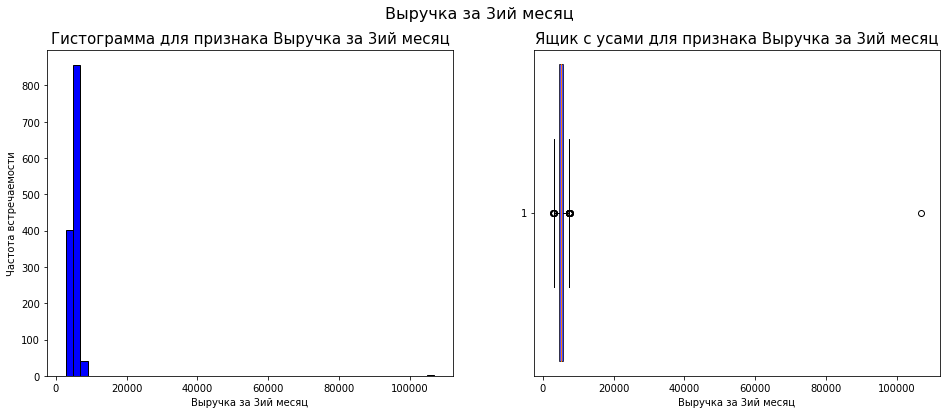

In [97]:
analyze_col(market_money.query('период == "текущий_месяц"')['выручка'], 'Выручка за 3ий месяц')

Неожиданный поворот. Видимо, кто-то решил выкупить всю корзину разом или купить что-то, что давно хотел, но не решался. Или ошибка при выгрузке данных.

count    1299.000000
mean     5236.787452
std       835.474686
min      2758.700000
25%      4705.500000
50%      5179.600000
75%      5759.950000
max      7799.400000
Name: выручка, dtype: float64


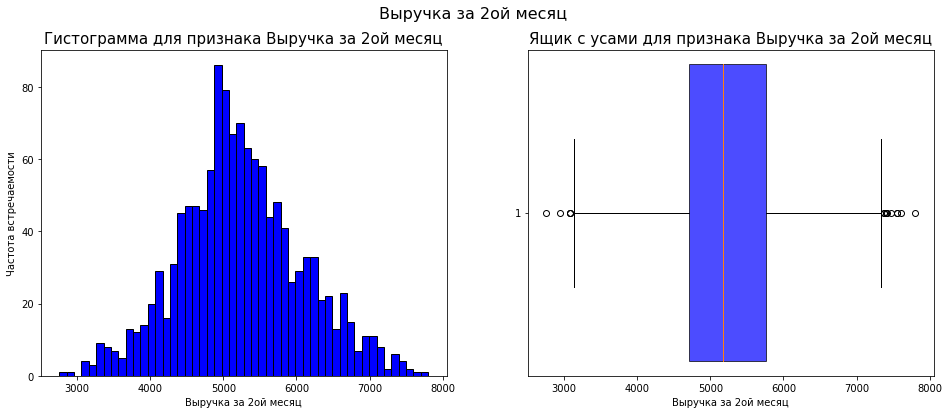

In [98]:
analyze_col(market_money.query('период == "текущий_месяц" & выручка < 100000')['выручка'], 'Выручка за 2ой месяц')

Видно, что распределение близко к нормальному. Выбросов с нулевыми значениями нет.

В целом виден тренд на увелчиение среднего значения выручки (и медианы выручки)

### Датасет market_time

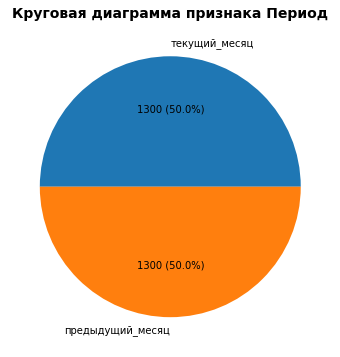

In [99]:
analyze_col(market_time['период'], 'Период')

В этом датасете собраны данные только за текущий и предыдущий месяц. Так что в целом воспользоваться данными за препредыдущий месяц вряд ли удастся поноценно

count    1300.000000
mean       13.467692
std         3.932029
min         5.000000
25%        11.000000
50%        13.000000
75%        17.000000
max        23.000000
Name: минут, dtype: float64


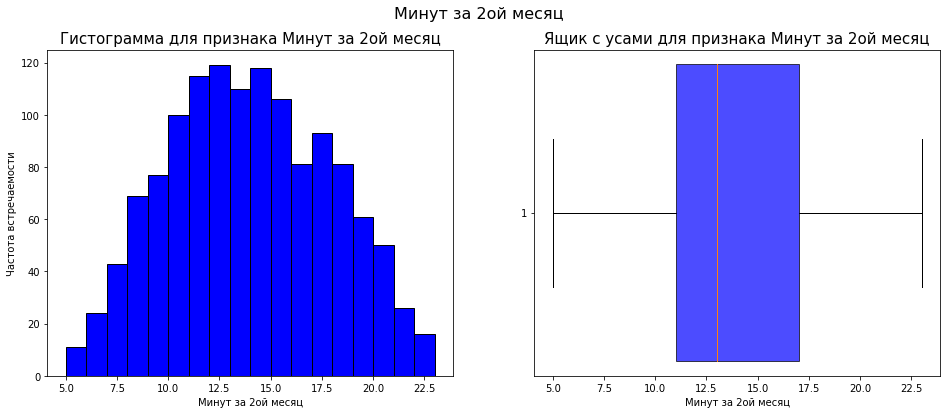

In [100]:
analyze_col(market_time.query('период == "предыдущий_месяц"')['минут'], 'Минут за 2ой месяц', bins=18)

Распределение близко к нормальному по форме. Но есть ассиметрия справа. Пользователи проводят на сайте не менее 5 минут. То есть, есть те, кто заходят, но не покупают (а именно три пользователя)

count    1300.000000
mean       13.204615
std         4.220589
min         4.000000
25%        10.000000
50%        13.000000
75%        16.000000
max        23.000000
Name: минут, dtype: float64


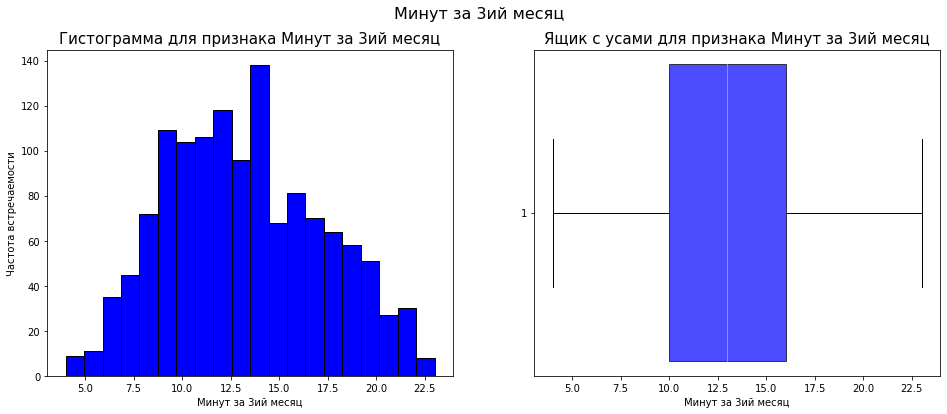

In [101]:
analyze_col(market_time.query('период == "текущий_месяц"')['минут'], 'Минут за 3ий месяц', bins=20)

Распределение по форме напоминает нормальное, но с выбросами. Среднее время осталось почти таким же, но вырос разброс данных

### Датасет money

count    1300.000000
mean        3.996631
std         1.013722
min         0.860000
25%         3.300000
50%         4.045000
75%         4.670000
max         7.430000
Name: прибыль, dtype: float64


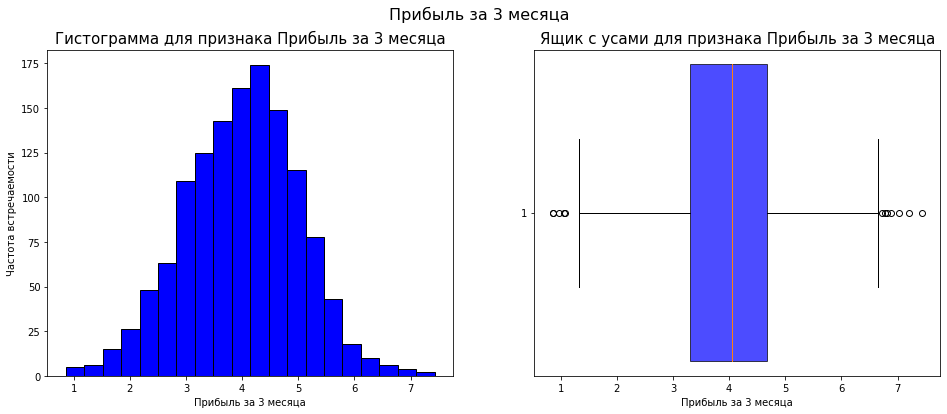

In [102]:
analyze_col(money['прибыль'], 'Прибыль за 3 месяца', bins=20)

Все пользователи принесли прибыль за последние три месяца. Однако надо удалить пользователей, которые не совершали покупки хотя бы в одтин из месяцев. Также стоит убрать пользователя с покупкой свыше 100 тыс. в месяц.

In [103]:
incorr_list = market_money[market_money['выручка'] > 100000]['id']
not_active_users_list = market_money[market_money['выручка'] == 0]['id']

In [104]:
not_active_users_list

0     215348
2     215348
28    215357
29    215357
34    215359
35    215359
Name: id, dtype: int64

In [105]:
market_file = market_file.query('id not in @incorr_list & id not in @not_active_users_list')
market_money = market_money.query('id not in @incorr_list & id not in @not_active_users_list')
market_time = market_time.query('id not in @incorr_list & id not in @not_active_users_list')
money = money.query('id not in @incorr_list & id not in @not_active_users_list')

In [106]:
market_file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 1 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1296 non-null   int64  
 1   покупательская_активность            1296 non-null   object 
 2   тип_сервиса                          1296 non-null   object 
 3   разрешить_сообщать                   1296 non-null   object 
 4   маркет_актив_6_мес                   1296 non-null   float64
 5   маркет_актив_тек_мес                 1296 non-null   int64  
 6   длительность                         1296 non-null   int64  
 7   акционные_покупки                    1296 non-null   float64
 8   популярная_категория                 1296 non-null   object 
 9   средний_просмотр_категорий_за_визит  1296 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1296 non-null   int64  
 11  ошибка_сервиса                

Удаление прошло успешно

**Вывод:**
- среди пользователей не было обнаружено никого, кто не принёс бы прибыли бизнесу. Однако был удалён пользователь с аномально большой выручкой за теущий месяц. Такой объект сильно бы повлиял на модель
- есть пользователи, которые склонны покупать товары по акции, хотя в среднем товаров по акции в районе 20%
- у некоторых пользоватлей в корзине за квартал находится от 8-10 товаров, хотя в среднем около 4
- за последние три месяца выручка сервиса росла
- за последний месяц время проведенное на сайте не изменилось

## Объединение таблиц

In [107]:
# Преобразование в широкий формат
market_money_pivot = market_money.pivot_table(
    index='id',
    columns='период',
    values='выручка',
    aggfunc='first'
).reset_index()

# Переименование столбцов
market_money_pivot.columns = ['id', 'выручка_препред_месяц', 'выручка_пред_месяц', 'выручка_тек_месяц']
print(market_money_pivot.head())

       id  выручка_препред_месяц  выручка_пред_месяц  выручка_тек_месяц
0  215349                 5216.0              4472.0             4971.6
1  215350                 5457.5              4826.0             5058.4
2  215351                 6158.0              4793.0             6610.4
3  215352                 5807.5              4594.0             5872.5
4  215353                 4738.5              5124.0             5388.5


In [108]:
# Преобразование в широкий формат
market_time_pivot = market_time.pivot_table(
    index='id',
    columns='период',
    values='минут',
    aggfunc='first'
).reset_index()

# Переименование столбцов
market_time_pivot.columns = ['id', 'время_пред_месяц', 'время_тек_месяц']
print(market_time_pivot.head())

       id  время_пред_месяц  время_тек_месяц
0  215349                12               10
1  215350                 8               13
2  215351                11               13
3  215352                 8               11
4  215353                10               10


In [109]:
data = market_file.merge(market_money_pivot, on='id', how='inner').merge(market_time_pivot, on='id', how='inner')

In [110]:
data.head()

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_препред_месяц,выручка_пред_месяц,выручка_тек_месяц,время_пред_месяц,время_тек_месяц
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
1,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
3,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
4,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10


In [111]:
describe_dataset(data)

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_препред_месяц,выручка_пред_месяц,выручка_тек_месяц,время_пред_месяц,время_тек_месяц
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
1,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
3,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
4,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10


Общие сведения о датасете data
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 0 to 1295
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1296 non-null   int64  
 1   покупательская_активность            1296 non-null   object 
 2   тип_сервиса                          1296 non-null   object 
 3   разрешить_сообщать                   1296 non-null   object 
 4   маркет_актив_6_мес                   1296 non-null   float64
 5   маркет_актив_тек_мес                 1296 non-null   int64  
 6   длительность                         1296 non-null   int64  
 7   акционные_покупки                    1296 non-null   float64
 8   популярная_категория                 1296 non-null   object 
 9   средний_просмотр_категорий_за_визит  1296 non-null   in

,"Процент пропусков, %",Количество пропусков
id,0.00,0.00
покупательская_активность,0.00,0.00
время_пред_месяц,0.00,0.00
выручка_тек_месяц,0.00,0.00
выручка_пред_месяц,0.00,0.00
выручка_препред_месяц,0.00,0.00
страниц_за_визит,0.00,0.00
ошибка_сервиса,0.00,0.00
неоплаченные_продукты_штук_квартал,0.00,0.00
средний_просмотр_категорий_за_визит,0.00,0.00


Явные дубликаты в датасете data
---------------------------------------------------------------------------
Количество строк-дубликатов 0 (0%)


**Вывод:** таблицы объединены. В новом датасете нет дубликатов и пропусков, что свидетельствует о верном слиянии

## Корреляционный анализ

Построим матрицу корреляции по критерию $\phi_k$

In [112]:
data.columns

Index(['id', 'покупательская_активность', 'тип_сервиса', 'разрешить_сообщать',
       'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
       'акционные_покупки', 'популярная_категория',
       'средний_просмотр_категорий_за_визит',
       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит', 'выручка_препред_месяц', 'выручка_пред_месяц',
       'выручка_тек_месяц', 'время_пред_месяц', 'время_тек_месяц'],
      dtype='object')

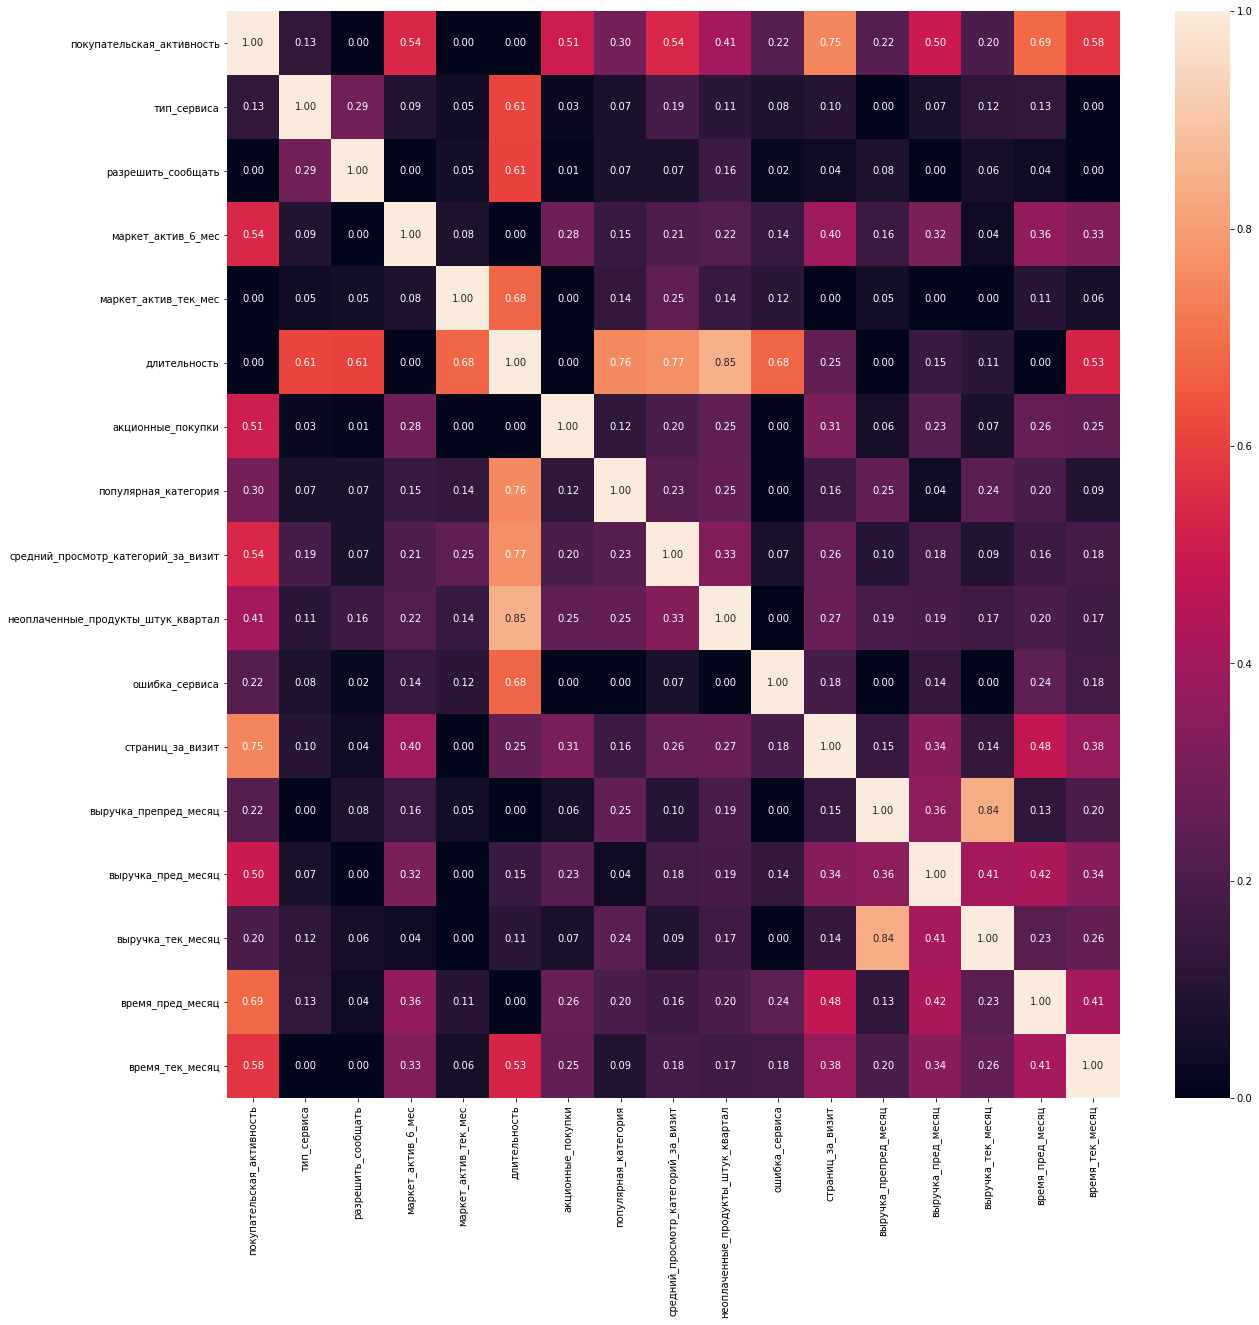

In [113]:
interval_cols = {
    'маркет_актив_6_мес',
    'акционные_покупки',
    'средний_просмотр_категорий_за_визит',
    'ошибка_сервиса',
    'страниц_за_визит',
    'время_пред_месяц',
    'время_тек_месяц',
    'выручка_препред_месяц',
    'выручка_пред_месяц',
    'выручка_тек_месяц'
}


plt.figure(figsize=(20, 20))

sns.heatmap(
    data.drop('id', axis=1).phik_matrix(
        interval_cols=interval_cols
    ), annot=True, fmt='.2f'
)

plt.show()

Выделим признаки, которые коррелируют линейно с целевым (покупательская активность). Будем считать, что приемлемый уровень корреляции >= 0.3.  
Заметим, что наиболее сильная линейная связь между целевым признаком и средним числом страниц за просмотр35

In [114]:
correlated_features = ['покупательская_активность',
                      'маркет_актив_6_мес',
                      'акционные_покупки',
                      'неоплаченные_продукты_штук_квартал',
                      'средний_просмотр_категорий_за_визит',
                       'страниц_за_визит',
                       'выручка_пред_месяц',
                       'время_пред_месяц',
                       'время_тек_месяц',
                       'популярная_категория'
                      ]
data = data[correlated_features]

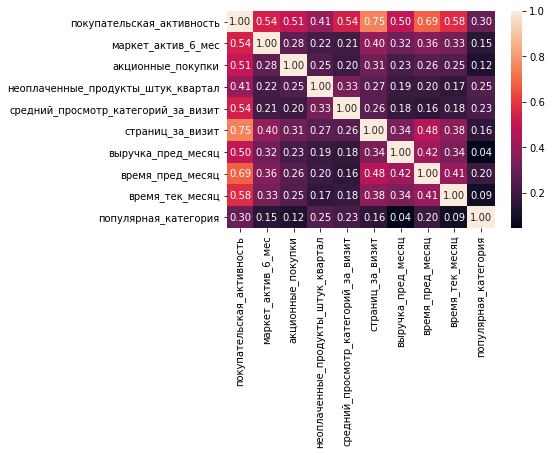

In [115]:
sns.heatmap(
    data.phik_matrix(
        interval_cols=interval_cols
    ), annot=True, fmt='.2f'
)

plt.show()

Избавимся от мультиколлинеарности в признаках. Воспользуемся уставкой в 0,45. Мультиколлинеарны признаки "выручка_пред_месяц" и "акционные_покупки" - 0,75, а также "страниц_за_визит" и "время_пред_месяц" - 0.48.
Однако эти признаки важны логически, поэтому оставим их в выборке

In [116]:
correlated_features_no_corr = ['покупательская_активность',
                      'маркет_актив_6_мес',
                      'акционные_покупки',
                      'неоплаченные_продукты_штук_квартал',
                      'средний_просмотр_категорий_за_визит',
                       'страниц_за_визит',
                       'время_тек_месяц',
                        'популярная_категория',
                        'время_пред_месяц',
                        'выручка_пред_месяц'
                      ]
data = data[correlated_features_no_corr]

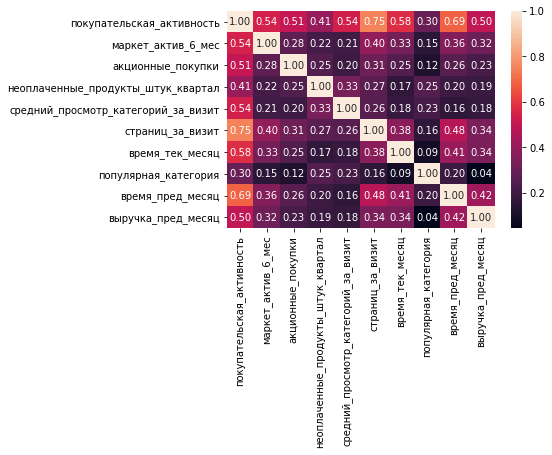

In [117]:
sns.heatmap(
    data.phik_matrix(
        interval_cols=interval_cols
    ), annot=True, fmt='.2f'
)

plt.show()

Также стоит отметить, что признак "время_тек_месяц" является утечкой целевого признака, так как по этим данным можно понять активность пользователя

In [118]:
correlated_features_no_corr = ['покупательская_активность',
                      'маркет_актив_6_мес',
                      'акционные_покупки',
                      'неоплаченные_продукты_штук_квартал',
                      'средний_просмотр_категорий_за_визит',
                       'страниц_за_визит',
                        'популярная_категория',
                        'время_пред_месяц',
                        'выручка_пред_месяц'
                      ]
data = data[correlated_features_no_corr]

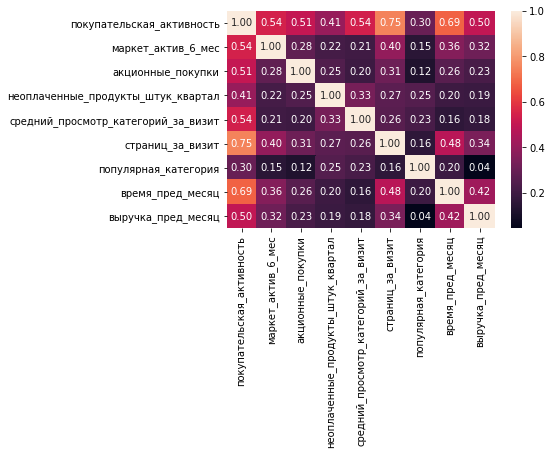

In [119]:
sns.heatmap(
    data.phik_matrix(
        interval_cols=interval_cols
    ), annot=True, fmt='.2f'
)

plt.show()

In [120]:
profit = (market_file.merge(market_money_pivot, on='id', how='inner')
          .merge(market_time_pivot, on='id', how='inner')
          .merge(money, on='id'))

In [121]:
profit.head()

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_препред_месяц,выручка_пред_месяц,выручка_тек_месяц,время_пред_месяц,время_тек_месяц,прибыль
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10,4.16
1,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13,3.13
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13,4.87
3,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11,4.21
4,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10,3.95


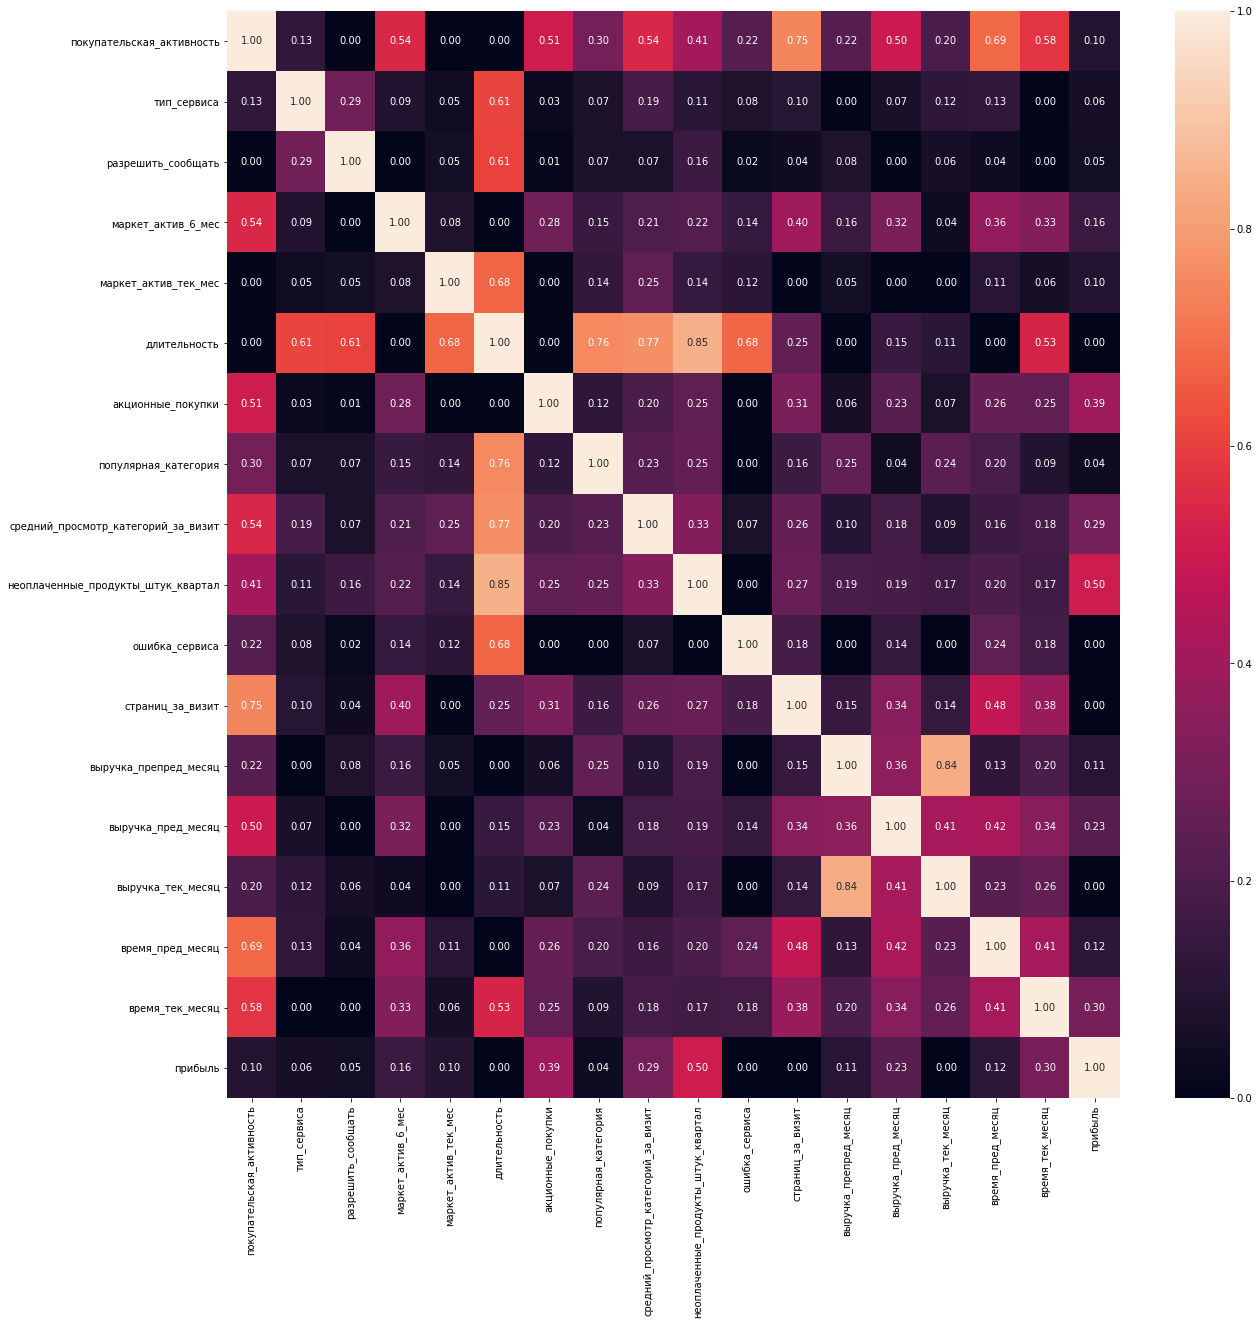

In [122]:
interval_cols = {
    'маркет_актив_6_мес',
    'акционные_покупки',
    'средний_просмотр_категорий_за_визит',
    'ошибка_сервиса',
    'страниц_за_визит',
    'время_пред_месяц',
    'время_тек_месяц',
    'выручка_препред_месяц',
    'выручка_пред_месяц',
    'выручка_тек_месяц'
}


plt.figure(figsize=(20, 20))

sns.heatmap(
    profit.drop('id', axis=1).phik_matrix(
        interval_cols=interval_cols
    ), annot=True, fmt='.2f'
)

plt.show()

Рассмотрим отдельно портрет клиентов со снижающейся активностью и с активностью на прежнем уровне

Наибольшим образом на прибыль влияют признаки акционные_покупки и неоплаченные_продукты. Выручка препред_месяц и выручка_пред_месяц не являются показательными, так как связь достаточно очевидна, так как прибыль складывается из выручки за последние полгода, туда входят и выручка за предыдущий и препредыдущий месяц - чем выше выручка, тем выше прибыль.

In [200]:
def num_feature_plot_hue(dataset, feature, bins=50, hue=None):
    """
    Строит распределение и диаграмму размаха для количественных признаков
    """
    plt.figure(figsize=(12, 6))
    sns.histplot(data=dataset, 
             x=feature, 
             hue=hue,
             element='step', 
             stat='density', 
             common_norm=False, 
             alpha=0.6)
    plt.title(f"Распределение признака {feature} по категориям {hue}")
    plt.show()

def cat_feature_plot_hue(dataset, feature_name, hue=None):
    hues = dataset[hue].unique()
# Настройки шрифта
    font_properties = {
        'family': 'DejaVu Sans',  # Шрифт
        'size': 18,         # Размер
        'weight': 'normal',   # Жирность 
        'color': 'black'    # Цвет
    }


    f, ax = plt.subplots(1, len(hues))

    #подпись общего графика, установкаразмера окна
    f.suptitle(f'Распределение признака {feature_name} по категориям {hue}', fontsize=32)
    f.set_size_inches(30, 10)
    all_categories = dataset[feature_name].unique()
    colors_list = ['blue', 'orange', 'green', 'red', 'purple', 'cyan', 'yellow', 
                  'magenta', 'lime', 'pink', 'brown', 'gray', 'olive', 'navy']
    category_colors = {}
    for j, category in enumerate(all_categories):
        category_colors[category] = colors_list[j % len(colors_list)]
    
    for i in range(len(hues)):
        hue_data = dataset[dataset[hue] == hues[i]]
        value_counts = hue_data[feature_name].value_counts()
        categories_in_hue = value_counts.index.tolist()
        
        colors_to_use = [category_colors[cat] for cat in categories_in_hue]
        ax[i].set_title(hues[i], fontsize=20)
        ax[i].pie(dataset[dataset[hue] == hues[i]][feature_name].value_counts(), 
          labels=dataset[dataset[hue] == hues[i]][feature_name].unique(), 
          autopct=lambda p: f'{p * sum(dataset[dataset[hue] == hues[i]][feature_name].value_counts()) / 100:.0f} ({p:.1f}%)',
          textprops=font_properties,
            colors=colors_to_use)

    plt.show()
    
def analyze_col_hue(dataset, feature_name, bins=50, hue=None):
    if dataset[feature_name].dtype == 'object':
        cat_feature_plot_hue(dataset, feature_name, hue)
    else:
        print(dataset[feature_name].describe())
        num_feature_plot_hue(dataset, feature_name, bins=bins, hue=hue)

count      1296.000000
mean     215999.464506
std         374.327860
min      215349.000000
25%      215675.750000
50%      215999.500000
75%      216323.250000
max      216647.000000
Name: id, dtype: float64


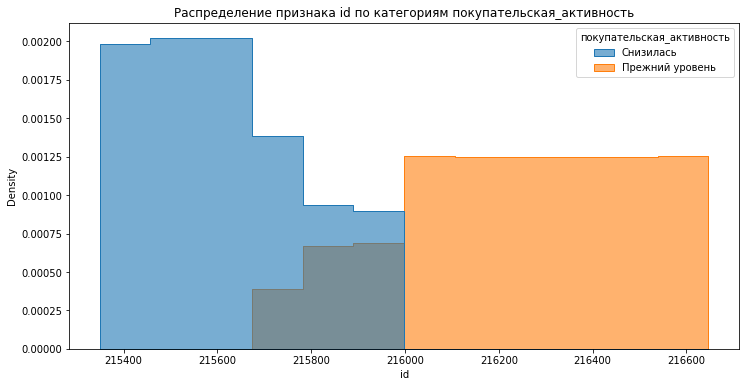

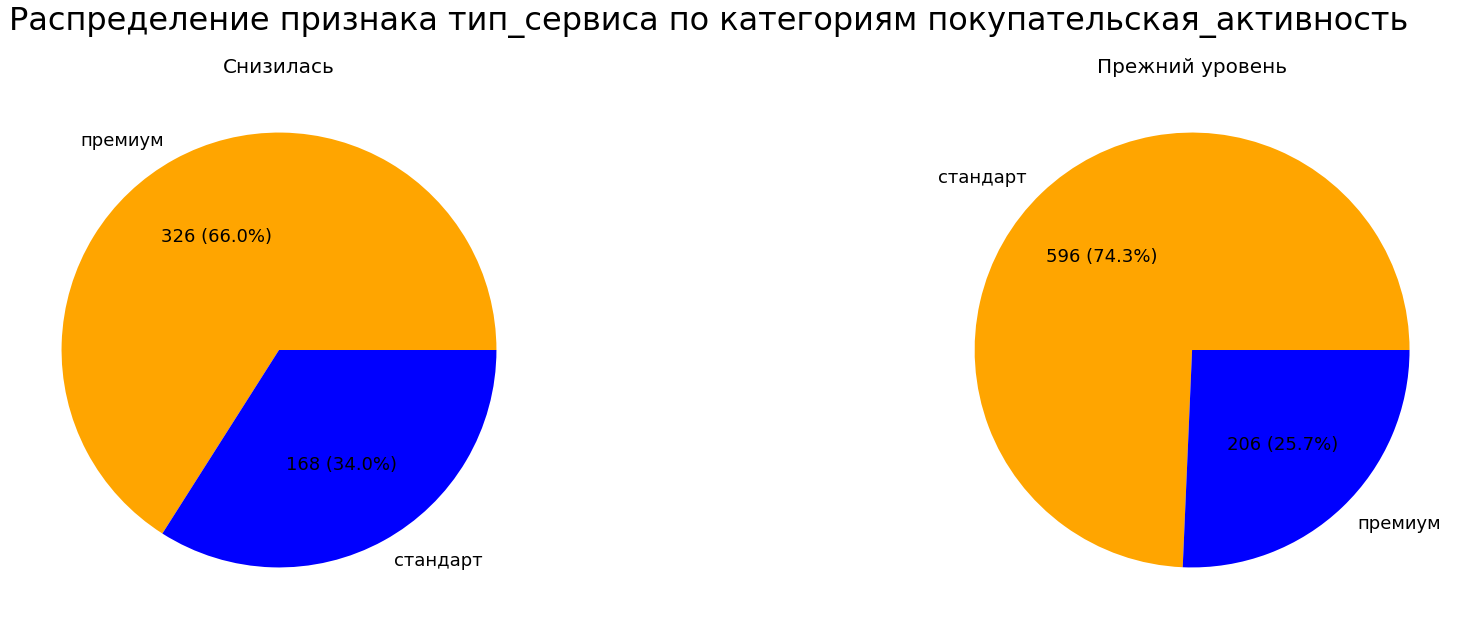

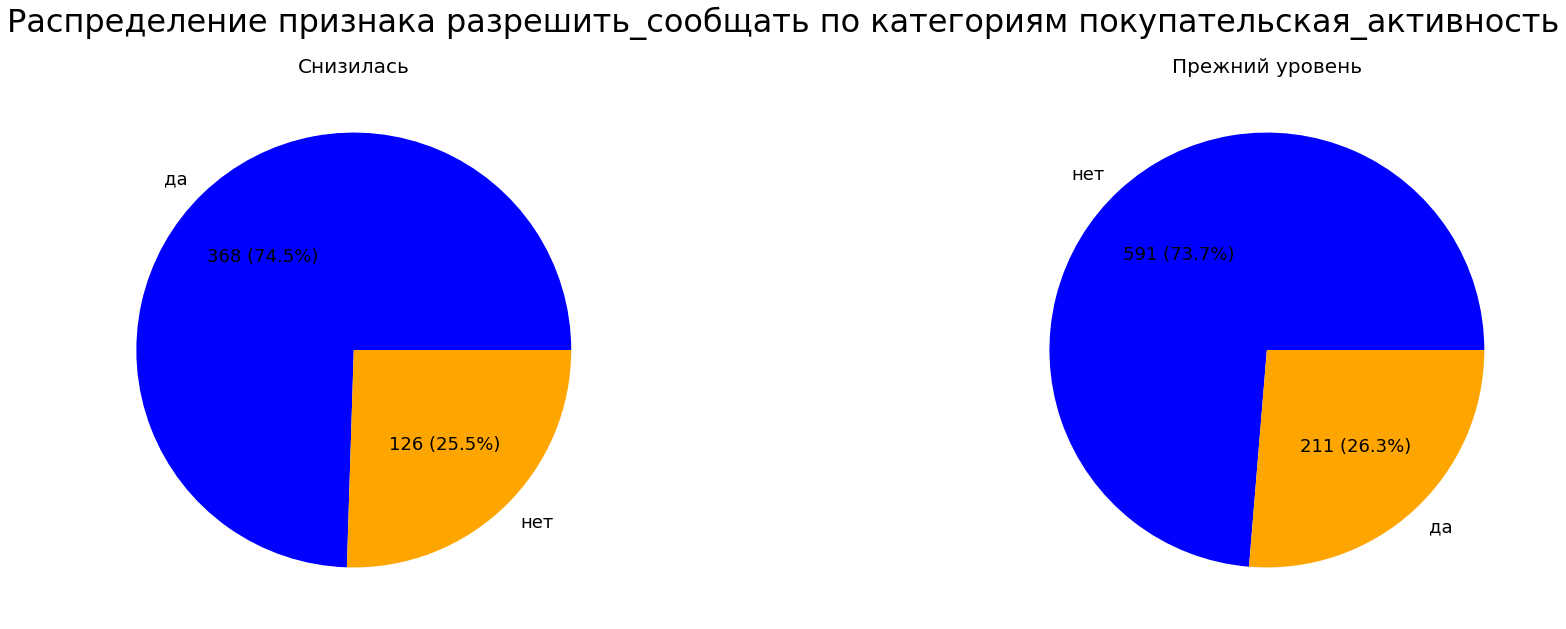

count    1296.000000
mean        4.256404
std         1.013525
min         0.900000
25%         3.700000
50%         4.200000
75%         4.900000
max         6.600000
Name: маркет_актив_6_мес, dtype: float64


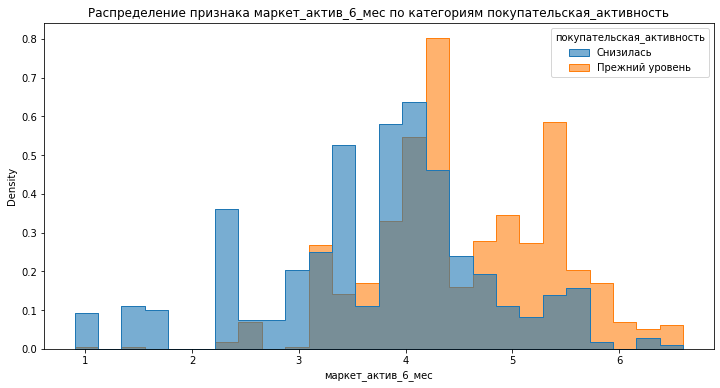

count    1296.000000
mean        4.009259
std         0.696316
min         3.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: маркет_актив_тек_мес, dtype: float64


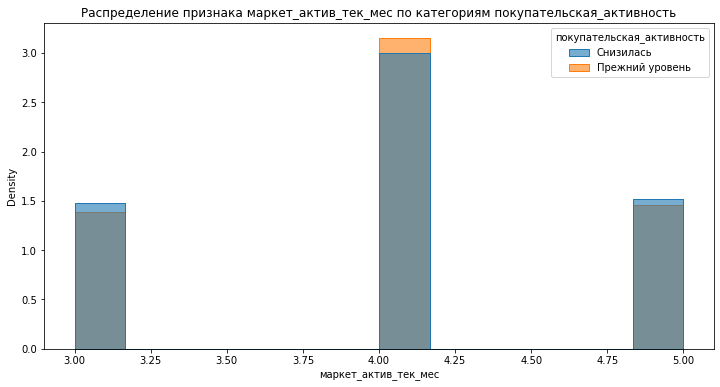

count    1296.000000
mean      602.967593
std       249.195823
min       121.000000
25%       409.500000
50%       606.500000
75%       806.250000
max      1079.000000
Name: длительность, dtype: float64


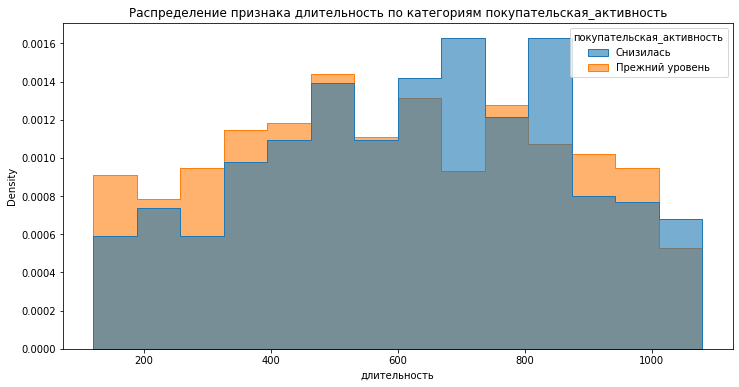

count    1296.000000
mean        0.320069
std         0.249159
min         0.110000
25%         0.170000
50%         0.240000
75%         0.300000
max         0.990000
Name: акционные_покупки, dtype: float64


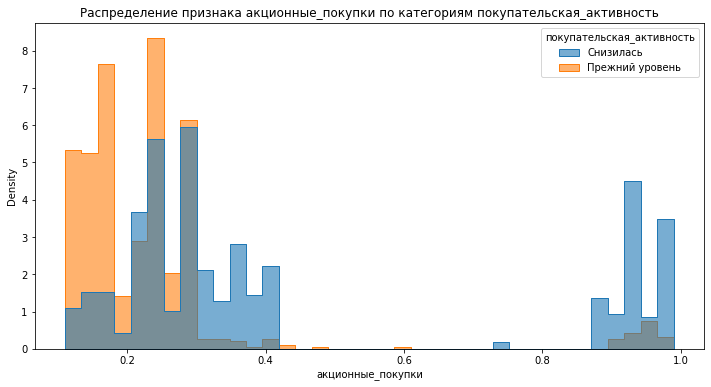

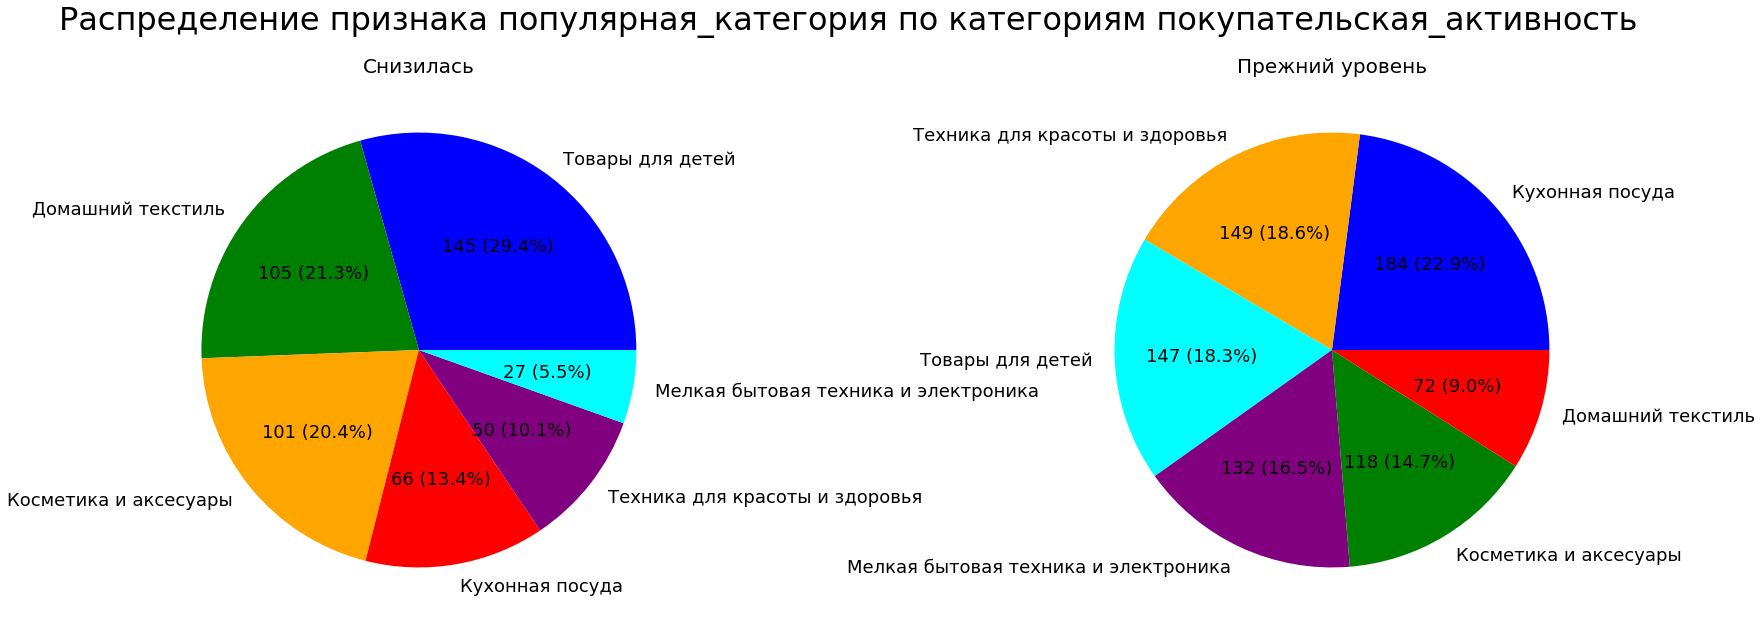

count    1296.000000
mean        3.267747
std         1.355125
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         6.000000
Name: средний_просмотр_категорий_за_визит, dtype: float64


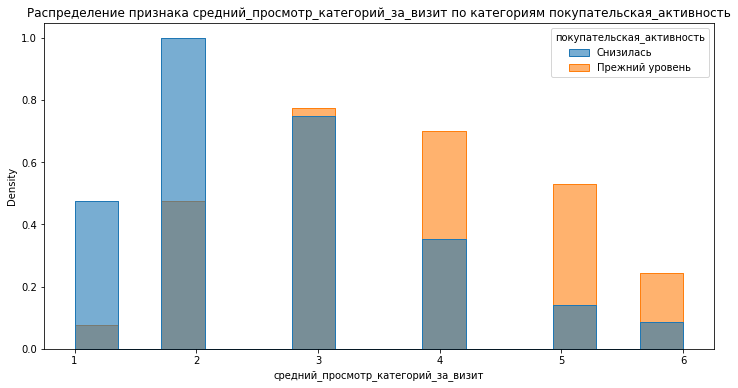

count    1296.000000
mean        2.841821
std         1.974074
min         0.000000
25%         1.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: неоплаченные_продукты_штук_квартал, dtype: float64


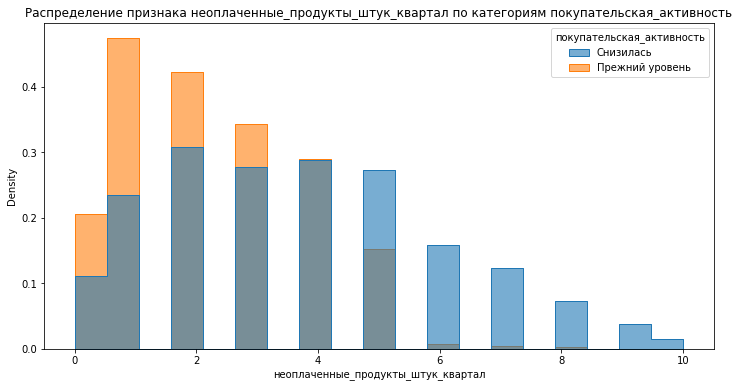

count    1296.000000
mean        4.184414
std         1.951719
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max         9.000000
Name: ошибка_сервиса, dtype: float64


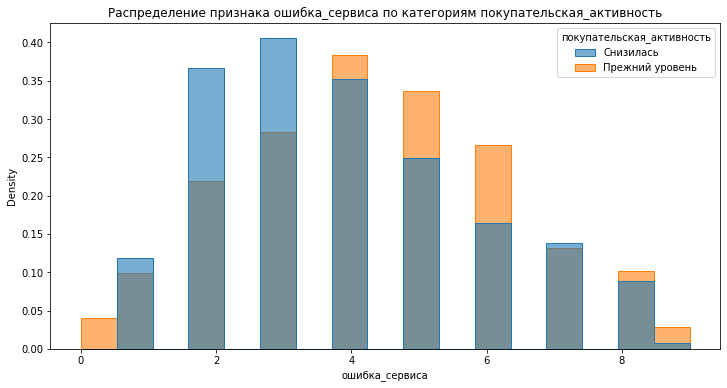

count    1296.000000
mean        8.187500
std         3.978459
min         1.000000
25%         5.000000
50%         8.000000
75%        11.000000
max        20.000000
Name: страниц_за_визит, dtype: float64


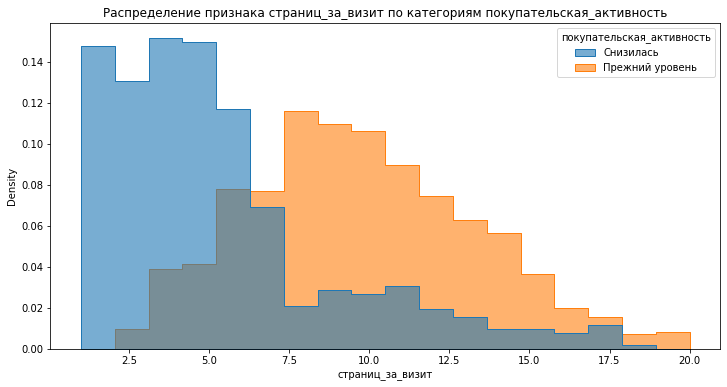

In [201]:
for col in market_file.columns:
    if col != 'покупательская_активность':
        analyze_col_hue(market_file, col, hue='покупательская_активность')

Из анализа графиков по категориям: 
- Среди пользователей с низкой активностью чаще встречаются пользователи со стандартной подпиской (34% против 74% у активных поль
- Пользователи с прежним уровнем активности чаще запрещают сообщать о дополнительных предложениях
- У пользователей с прежнем уровнем активности чаще происходят маркетинговые взаимодействия
- Активные пользователи реже склонны покупать товары по акциям
- Активные пользователи склонны покупат товары в категории кухонная посуда, а пользователи со сниженной активностью - товары для детей
- У активных пользователей меньше неоплаченных товаров
- Активные пользователи в среднем смотрят большей категорий за визит
- У активных пользователей в среднем больше просмотренных страниц за визит

Рассмотрим более детально числовеы признаки в разных категориях

,id,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_препред_месяц,выручка_пред_месяц,выручка_тек_месяц,время_пред_месяц,время_тек_месяц,прибыль
count,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000
mean,215612.593117,3.747166,4.006073,622.834008,0.452713,2.621457,3.732794,3.939271,5.574899,4971.674089,4678.281377,5303.671660,10.939271,10.947368,4.001154
std,164.974405,1.052777,0.707797,237.817052,0.304428,1.223678,2.292385,1.882005,3.463729,808.878139,291.409987,894.759119,3.476428,3.418311,0.976446
min,215349.000000,0.900000,3.000000,121.000000,0.110000,1.000000,0.000000,1.000000,1.000000,2890.000000,4098.000000,2758.700000,5.000000,4.000000,1.060000
25%,215475.250000,3.100000,4.000000,449.000000,0.240000,2.000000,2.000000,2.000000,3.000000,4482.500000,4466.750000,4651.025000,8.000000,9.000000,3.305000
50%,215598.500000,3.900000,4.000000,636.500000,0.310000,2.000000,4.000000,4.000000,5.000000,5052.750000,4668.000000,5293.650000,10.000000,10.000000,4.050000
75%,215721.750000,4.400000,5.000000,812.500000,0.890000,3.000000,5.000000,5.000000,7.000000,5541.750000,4848.500000,5946.450000,13.000000,13.000000,4.640000
max,215941.000000,6.600000,5.000000,1079.000000,0.990000,6.000000,10.000000,9.000000,18.000000,6869.500000,5621.000000,7799.400000,23.000000,22.000000,7.430000


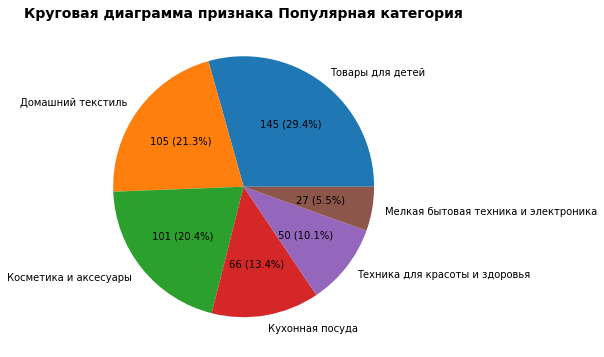

In [125]:
clients_low_activity = profit.query('покупательская_активность == "Снизилась"')
display(clients_low_activity.describe())
analyze_col(clients_low_activity['популярная_категория'], 'Популярная категория')

,id,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_препред_месяц,выручка_пред_месяц,выручка_тек_месяц,время_пред_месяц,время_тек_месяц,прибыль
count,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000
mean,216237.761845,4.570075,4.011222,590.730673,0.238367,3.665835,2.293017,4.335411,9.796758,4932.559227,4933.475062,5197.704115,15.029925,14.604738,3.995574
std,246.221370,0.848618,0.689586,255.330179,0.160599,1.277112,1.508255,1.979538,3.376846,625.075845,320.484850,792.685086,3.352991,4.064355,1.032618
min,215748.000000,0.900000,3.000000,121.000000,0.110000,1.000000,0.000000,0.000000,3.000000,2970.000000,4338.000000,2952.200000,7.000000,4.000000,0.860000
25%,216046.250000,4.000000,4.000000,382.500000,0.150000,3.000000,1.000000,3.000000,7.000000,4507.500000,4683.250000,4726.475000,13.000000,12.000000,3.292500
50%,216246.500000,4.400000,4.000000,590.000000,0.210000,4.000000,2.000000,4.000000,10.000000,4977.250000,4927.000000,5122.550000,15.000000,15.000000,4.040000
75%,216446.750000,5.275000,4.000000,798.750000,0.260000,5.000000,3.000000,6.000000,12.000000,5349.500000,5172.500000,5612.800000,18.000000,18.000000,4.727500
max,216647.000000,6.600000,5.000000,1061.000000,0.990000,6.000000,8.000000,9.000000,20.000000,6531.000000,5663.000000,7547.800000,23.000000,23.000000,7.210000


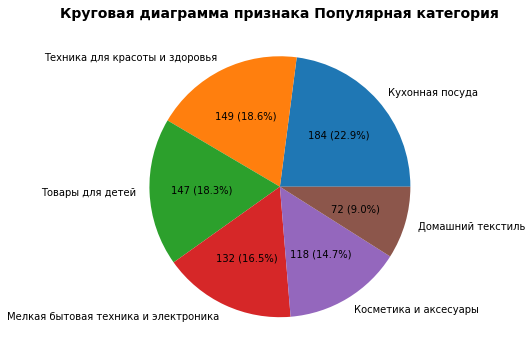

In [126]:
clients_high_activity = profit.query('покупательская_активность == "Прежний уровень"')
display(clients_high_activity.describe())
analyze_col(clients_high_activity['популярная_категория'], 'Популярная категория')

Видим, что у активных клиентов в среднем:
- меньшая доля покупок по акции (0,2 против 0,4)
- больше средний просмотр категорий за визит (3,6 против 2,6)
- меньше неоплаченных продуктов (2,3 против 3,7)
- больше просмотр страниц (9,8 против 5,6)
- больше число минут в сервисе за последние два месяца

На основе этих признаков можно попробовать провести сегментацию. Также сегментацию можно провести на основе длительности регистрации в сервисе.

**Вывод:**
Был проведен корреляционный анализ признаков в итоговом датасете. Были выявлены признаки, линейно коррелирующие с целевым, были убраны признаки с мультиколлинеарностью, а также предотвращена утечка целевого признака через признак "время_тек_месяц"

## Использование пайплайнов

Подготовим пайплайн для работы с данными, который будет состоять из нескольких этапов:
- Подготовка данных с помощью масштабирования числовых признаков, а также кодирования категориальных признаков
- Обучение моделей

Предварительно разобьём данные на тестовую и обучающую выборку со стратификацией по целевому признаку.

In [127]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('покупательская_активность', axis=1),
    data['покупательская_активность'],
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = data['покупательская_активность'])
print('Размерность выборки X_train: ', X_train.shape)
print('Размерность выборки X_test: ', X_test.shape)
print('Размерность выборки y_train: ', y_train.shape)
print('Размерность выборки y_test: ', y_test.shape)

Размерность выборки X_train:  (972, 8)
Размерность выборки X_test:  (324, 8)
Размерность выборки y_train:  (972,)
Размерность выборки y_test:  (324,)


Подготовим признаки для предобработки

In [128]:
ohe_columns = ['популярная_категория']
num_columns = ['маркет_актив_6_мес',
               'акционные_покупки',
               'страниц_за_визит',
               'средний_просмотр_категорий_за_визит', 
               'неоплаченные_продукты_штук_квартал',
              'время_пред_месяц',
            'выручка_пред_месяц']

Начнём подготовку пайплайна с создания пайплайна для кодирования признаков

In [129]:
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
    ]
    )

На его основе создадим пайплайн для преодобработки данных

In [130]:
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

Начнём создание итогового пайплайна, который состоит из оверсэмплинга, пайплайна по предобработке данных и обучения модели

In [131]:
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

Создадим набор словарей для подбора оптимальной модели. В качестве метрики для оценки качества выберем roc-auc. Так как нет явного указания на то, что является более важным и нужным.

In [132]:
param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(1,7),
        'models__max_features': range(1,7),
        'models__min_samples_leaf': range(1,6),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'],
        'preprocessor__ohe__ohe__drop': ['first']
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2,10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'],
        'preprocessor__ohe__ohe__drop': ['first']
    
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1,6),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'],
        'preprocessor__ohe__ohe__drop': ['first']
    },
    
    # словарь для модели SVC()
    {
        'models': [SVC(
            random_state=RANDOM_STATE,
            kernel='poly'
        )],
        'models__degree': range(1,4),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'],
        'preprocessor__ohe__ohe__drop': ['first']
    }
    
]


In [133]:
data_preprocessor.fit(X_train)
transformed_features = data_preprocessor.get_feature_names_out()
print("Всего фичей после преобразования:", len(transformed_features))
print("Названия фичей:", transformed_features)

Всего фичей после преобразования: 12
Названия фичей: ['ohe__популярная_категория_Косметика и аксесуары'
 'ohe__популярная_категория_Кухонная посуда'
 'ohe__популярная_категория_Мелкая бытовая техника и электроника'
 'ohe__популярная_категория_Техника для красоты и здоровья'
 'ohe__популярная_категория_Товары для детей' 'num__маркет_актив_6_мес'
 'num__акционные_покупки' 'num__страниц_за_визит'
 'num__средний_просмотр_категорий_за_визит'
 'num__неоплаченные_продукты_штук_квартал' 'num__время_пред_месяц'
 'num__выручка_пред_месяц']


Зададим параметры для автоматизированного поиска гиперпараметров с помощью GridSearchCV. Предварительно закодируем целевой признак

In [134]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [135]:
import warnings
warnings.filterwarnings('ignore')
grid = GridSearchCV(
    pipe_final, 
    param_grid=param_grid, 
    cv=5,
    scoring='roc_auc', 
    n_jobs=-1
)
grid.fit(X_train, y_train)
print(grid.best_estimator_)
print('ROC-AUC для лучшей модели на тренировочных данных: ', grid.best_score_)
print('ROC-AUC для лучшей модели на тестовых данных: ', roc_auc_score(y_test, grid.best_estimator_.predict_proba(X_test)[:, 1]))

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['популярная_категория']),
                                                 ('num', MinMaxScaler(),
                                                  ['маркет_актив_6_мес',
                                                 

**Вывод:**
Был создан пайплайн, состоящий из этапов предобработки данных и обучения. В качестве метрики для выбора оптимальной модели и её гиперпараметров была выбрана метрика ROC-AUC. По итогам была выбрана модель на основе метода опорных векторов. Метрика ROC-AUC на тестовых данных составила 91,8%

## Анализ важности признаков

Выделим признаки с помощью метода SelectKBest

In [136]:
selector = SelectKBest(f_classif, k='all')

X_train_preprocessed = pipe_final.named_steps['preprocessor'].fit_transform(X_train)

X_test_preprocessed = pipe_final.named_steps['preprocessor'].transform(X_test)

feature_names = pipe_final.named_steps['preprocessor'].get_feature_names_out()

X_test_preprocessed = pd.DataFrame(X_test_preprocessed, columns=feature_names)

selector.fit(X_train_preprocessed, y_train)

features_names = X_test_preprocessed.columns[selector.get_support(indices=True)]

for name in features_names:
    print(name)

ohe__популярная_категория_Косметика и аксесуары
ohe__популярная_категория_Кухонная посуда
ohe__популярная_категория_Мелкая бытовая техника и электроника
ohe__популярная_категория_Техника для красоты и здоровья
ohe__популярная_категория_Товары для детей
num__маркет_актив_6_мес
num__акционные_покупки
num__страниц_за_визит
num__средний_просмотр_категорий_за_визит
num__неоплаченные_продукты_штук_квартал
num__время_пред_месяц
num__выручка_пред_месяц


C помощью permutation importance прорнажируем признаки согласно их важности при принятии решения моделью

{'importances_mean': array([ 0.00190915,  0.00080087,  0.00416616,  0.0035918 , -0.00208713,
        0.0081948 ,  0.01858998,  0.02485135,  0.02218177, -0.00163411,
        0.03323221,  0.00337338]), 'importances_std': array([0.00103294, 0.00036841, 0.00483866, 0.00216304, 0.00147657,
       0.00801742, 0.00407469, 0.00784568, 0.0057546 , 0.00129903,
       0.00596051, 0.00240557]), 'importances': array([[ 0.0010112 ,  0.0010921 ,  0.00384258,  0.00202241,  0.00157748],
       [ 0.00028314,  0.00064717,  0.00088986,  0.00141569,  0.00076852],
       [ 0.00618857,  0.0098289 ,  0.00796829, -0.00206286, -0.0010921 ],
       [ 0.00404482,  0.00647171,  0.00040448,  0.00505602,  0.00198196],
       [ 0.00052583, -0.00266958, -0.00400437, -0.00198196, -0.00230555],
       [-0.00230555,  0.01403551,  0.00428751,  0.00457064,  0.02038588],
       [ 0.01520851,  0.0242689 ,  0.01363103,  0.02228694,  0.0175545 ],
       [ 0.0166242 ,  0.03935607,  0.02297456,  0.01977915,  0.02552279],
       

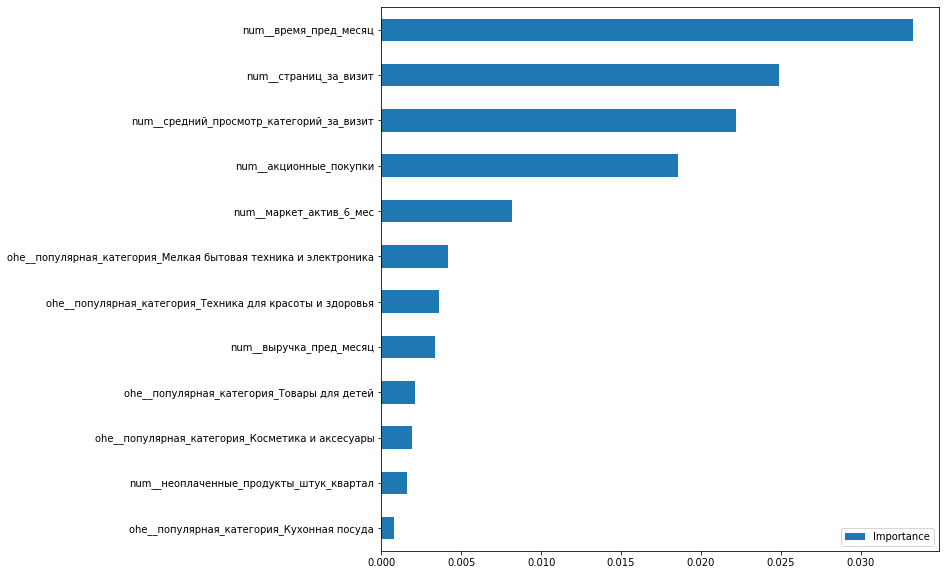

In [137]:
result = permutation_importance(grid.best_estimator_['models'], X_test_preprocessed, y_test, scoring='roc_auc')
print(result)
feature_importance = pd.DataFrame({'Feature': features_names, 'Importance': np.abs(result['importances_mean'])})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 10), ylabel='', xlabel='')
plt.show()

Воспользуемся методом SHAP, чтобы выяснить направление влияние каждого признака. Здесь будем использовать тестовые данные для уменьшения времени выполнения ячеек

In [138]:
explainer = shap.KernelExplainer(grid.best_estimator_['models'].predict, X_test_preprocessed)
shap_values = explainer(X_test_preprocessed)


Using 324 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/324 [00:00<?, ?it/s]

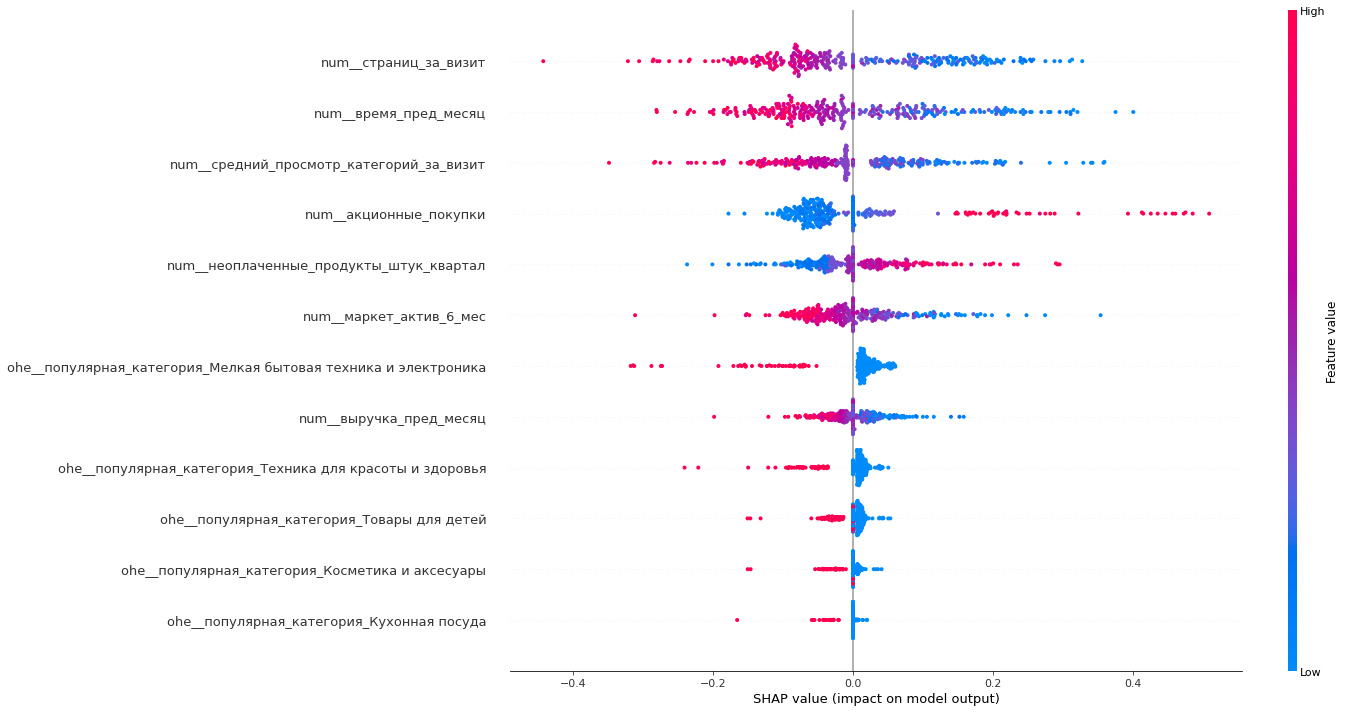

In [139]:
shap.summary_plot(shap_values, X_test_preprocessed, plot_size=(20,10))

**Вывод:** 
- Согласно анализу коэффициентов модели, сильнее всего на принятие решения влияют среднее количество посещенных страниц, среднее время посещения в предыдущем меясце, средний просмотор категорий за визит и акционные покупки
- SHAP анализ подтвердил выводы. И уточнил, что количество посещенных страниц, среднее время и средний просмотр категорий за визит отрицательно влияет на склонность к покупке. При этом акционные товары и неоплаченные продукты в корзине наоборот сподивгают к покупкам.

## Сегментация покупателей

Рассмотрим подробнее сегментацию на основе доли акционных продуктов. К тому же в распределении этого признака наблюдается две очевидные категории.

count    1296.000000
mean        0.320069
std         0.249159
min         0.110000
25%         0.170000
50%         0.240000
75%         0.300000
max         0.990000
Name: акционные_покупки, dtype: float64


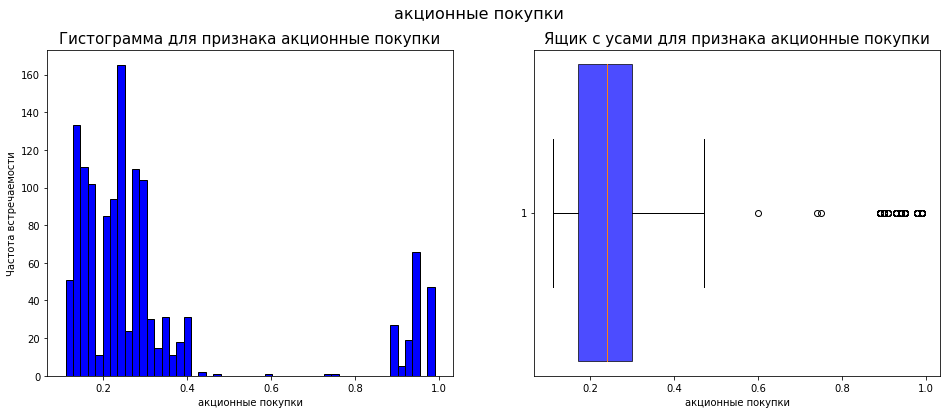

In [140]:
analyze_col(profit['акционные_покупки'], "акционные покупки")

Разделим пользователей на две категории: любители акций и обычные пользователи

In [141]:
sales_user = profit.query('акционные_покупки >= 0.6')
average_user = profit.query('акционные_покупки < 0.6')

count    1129.000000
mean        4.016811
std         1.010969
min         0.860000
25%         3.320000
50%         4.060000
75%         4.700000
max         7.430000
Name: прибыль, dtype: float64


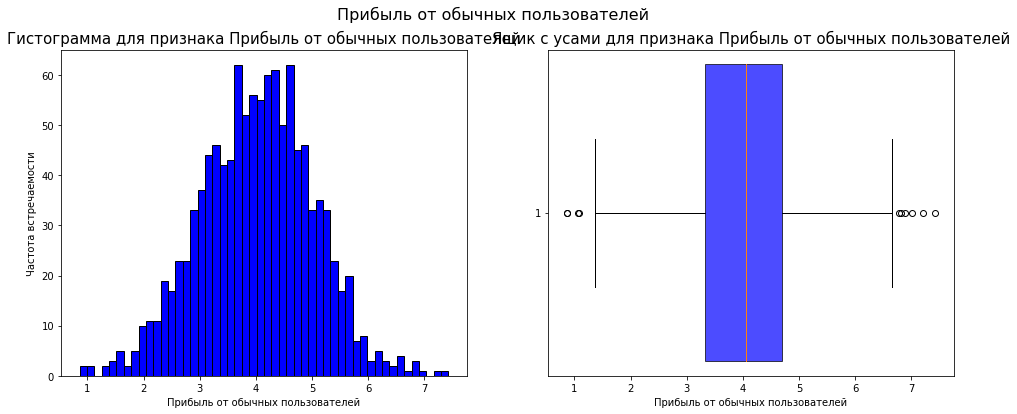

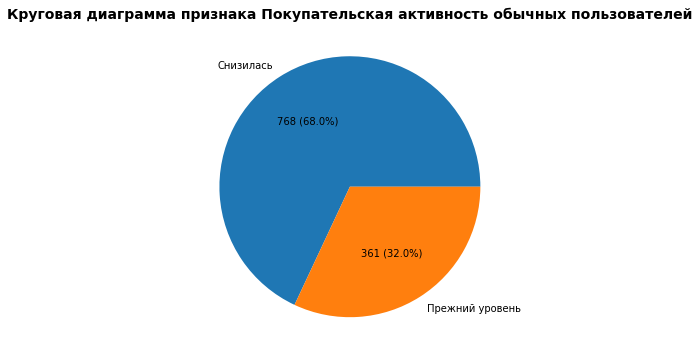

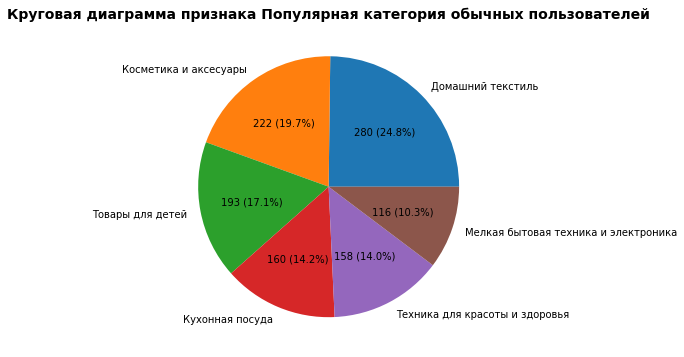

count    1129.000000
mean        8.551816
std         3.945688
min         1.000000
25%         5.000000
50%         8.000000
75%        11.000000
max        20.000000
Name: страниц_за_визит, dtype: float64


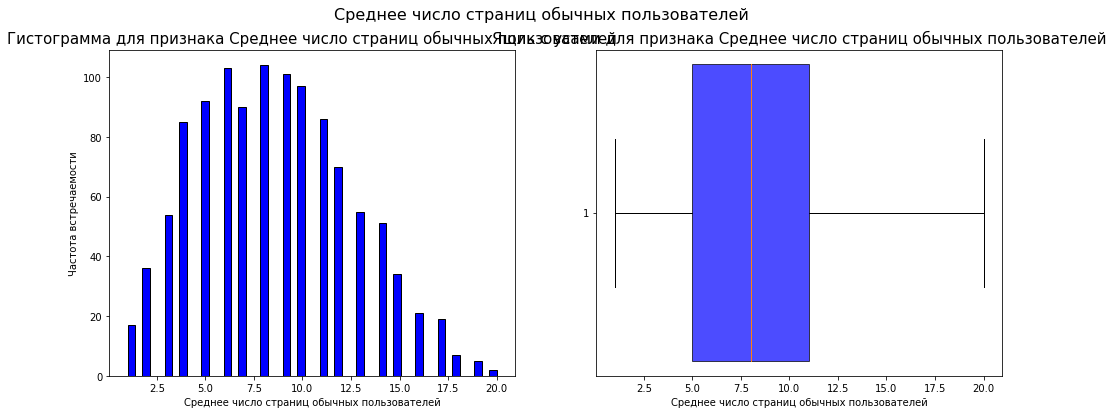

In [142]:
analyze_col(average_user['прибыль'], 'Прибыль от обычных пользователей')
analyze_col(average_user['покупательская_активность'], 'Покупательская активность обычных пользователей')
analyze_col(average_user['популярная_категория'], 'Популярная категория обычных пользователей')
analyze_col(average_user['страниц_за_визит'], 'Среднее число страниц обычных пользователей')

count    167.000000
mean       3.868503
std        1.006256
min        1.330000
25%        3.155000
50%        4.000000
75%        4.480000
max        6.730000
Name: прибыль, dtype: float64


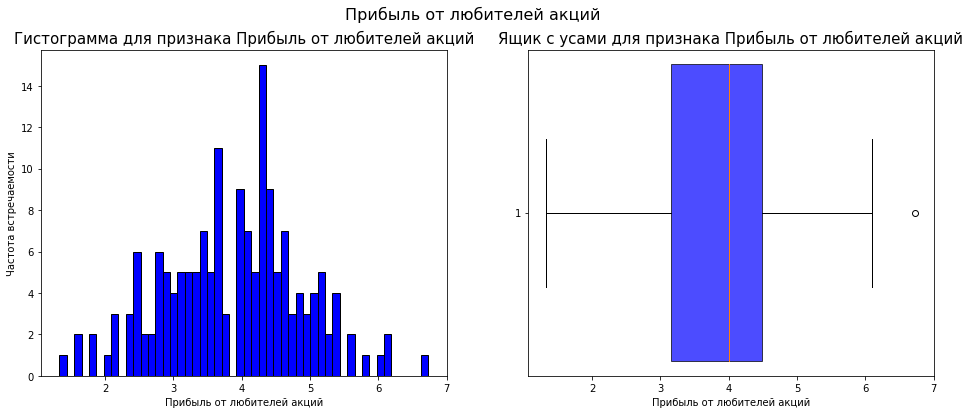

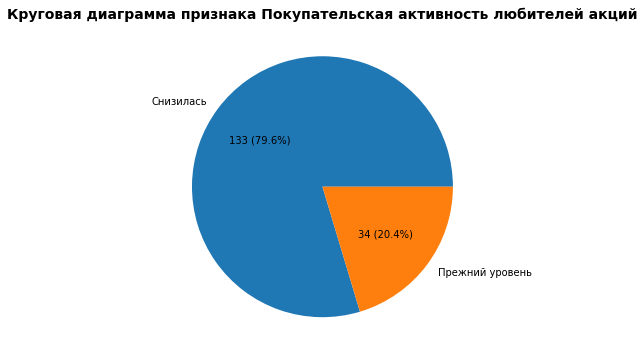

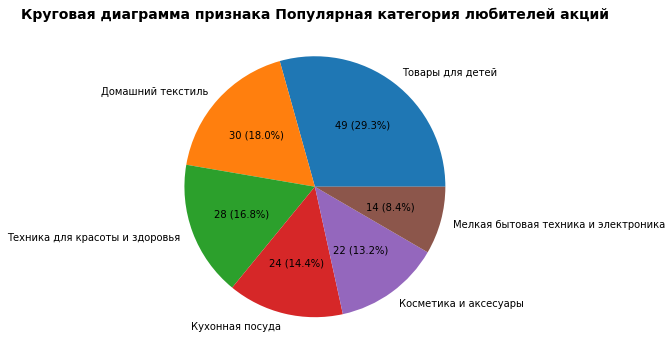

count    167.000000
mean       5.724551
std        3.268441
min        1.000000
25%        3.000000
50%        5.000000
75%        7.000000
max       15.000000
Name: страниц_за_визит, dtype: float64


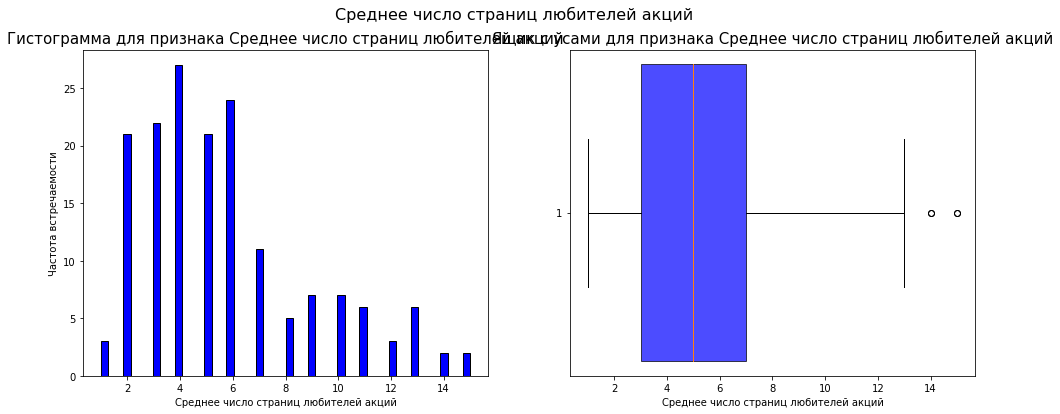

In [143]:
analyze_col(sales_user['прибыль'], 'Прибыль от любителей акций')
analyze_col(sales_user['покупательская_активность'], 'Покупательская активность любителей акций')
analyze_col(sales_user['популярная_категория'], 'Популярная категория любителей акций')
analyze_col(sales_user['страниц_за_визит'], 'Среднее число страниц любителей акций')

Видно, что любители акций чаще обладают высоким риском к снижению активности. При этом средняя прибыль от них примерно такая же, как и у обычных пользователей. Подробнее рассмотрим, как распределены веротяности оттка в этой группе пользователей. Пределы определим по графику (вероятность больше 0,7 и доля покупок больше 0,6)

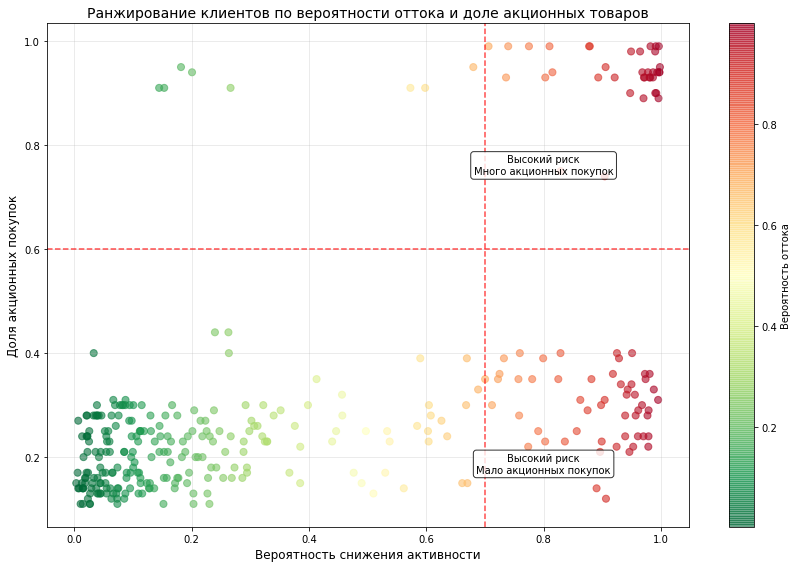

NameError: name 'high_risk_high_revenue' is not defined

In [144]:
y_pred_proba = grid.best_estimator_.predict_proba(X_test)[:, 1]


results_df = pd.DataFrame({
    'id': X_test.index,  
    'churn_probability': y_pred_proba,
    'акционные_покупки': X_test['акционные_покупки'],  
    'actual_churn': y_test
})

# Сортируем по вероятности оттока
results_df = results_df.sort_values('churn_probability', ascending=False)

# Визуализация
plt.figure(figsize=(12, 8))

# Скаттерплот
scatter = plt.scatter(results_df['churn_probability'], 
                     results_df['акционные_покупки'], 
                     c=results_df['churn_probability'], 
                     cmap='RdYlGn_r', 
                     alpha=0.6,
                     s=50)

# Настройки графика
plt.colorbar(scatter, label='Вероятность оттока')
plt.xlabel('Вероятность снижения активности', fontsize=12)
plt.ylabel('Доля акционных покупок', fontsize=12)
plt.title('Ранжирование клиентов по вероятности оттока и доле акционных товаров', fontsize=14)
plt.grid(True, alpha=0.3)

# Добавляем квадранты для сегментации
plt.axhline(y=0.6, color='red', linestyle='--', alpha=0.7)
plt.axvline(x=0.7, color='red', linestyle='--', alpha=0.7)  # порог высокой вероятности оттока

# Аннотации для квадрантов
plt.text(0.8, results_df['акционные_покупки'].quantile(0.865), 'Высокий риск\nМного акционных покупок', 
         fontsize=10, ha='center', bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8))
plt.text(0.8, results_df['акционные_покупки'].quantile(0.25), 'Высокий риск\nМало акционных покупок', 
         fontsize=10, ha='center', bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8))

plt.tight_layout()
plt.show()

# Анализ сегментов
high_risk_high_sales = results_df[
    (results_df['churn_probability'] > 0.7) & 
    (results_df['акционные_покупки'] > 0.6)
]
high_risk_high_sales_ids = high_risk_high_sales['id'].to_list()
print(f"Клиентов в сегменте 'Высокий риск + Много акционных покупок': {len(high_risk_high_revenue)}")
print(f"Средняя доля акционных покупок в этом сегменте: {high_risk_high_sales['акционные_покупки'].mean():.2f}")
print(f"Средняя вероятность оттока: {high_risk_high_sales['churn_probability'].mean():.3f}")

Рассмотрим сегмент покупателей, у которых высокий риск оттока и много акционных покупок

In [ ]:
high_risk_high_sales_df = X_test.query('index in @high_risk_high_sales_ids')

In [ ]:
analyze_col(high_risk_high_sales_df['популярная_категория'], 'популярная категория')
analyze_col(high_risk_high_sales_df['страниц_за_визит'], 'Среднее число страниц любителей акций')

**Вывод:**
Как видно, у любителей акций меньшее число посещений карточек товаров за визит. Что свойственно пользователям со сниженной покупательской активностью. 
Возможно, стоит более активно продвигать акционные продукты. В таком случае, пользователи, склонные к покупкам по акции, будут чаще смотреть товары и чаще их покупать. Также стоит напоминать об окончании сроков акций продуктов в корзине, так это будет стимулировать пользователей выкупать товары оттуда. Как правило, в этом сегменте популярна категория товаров для детей. Если в этой категории чаще делать акции, то этот сегмент можно удержать и вовлечь в покупки новых товаров.

## Общий вывод

В процессе работы были проведены: 
1. Выгрузка данных
Были выгружены 4 датасета: 
- market_file.csv
- market_money.csv
- market_time.csv
- money.csv  

Было изменено наименование столбцов для удоства работы. Данные совпали с описанием

2. Предобработка данных 
Данные из всех четырех наборов предобработаны: 
- в датасете market_file исправлены неявные дубликаты (замена "стандартт" на "стандарт"), что, скорее всего, является ошибкой при заполнении данных. Необходимо это проверить
- в датасете money исправлен тип данных в столбце "прибыль". Необходимо изменить процесс выгрузки данных, чтобы такого не повторялось

3. Исследовательский анализ данных
- Данные в основном распределены нормально, что позволяет работать с ними дальше
- среди пользователей не было обнаружено никого, кто не принёс бы прибыли бизнесу. Однако был удалён пользователь с аномально большой выручкой за теущий месяц. Такой объект сильно бы повлиял на модель
- есть пользователи, которые склонны покупать товары по акции, хотя в среднем товаров по акции в районе 20%
- у некоторых пользоватлей в корзине за квартал находится от 8-10 товаров, хотя в среднем около 4
- за последние три месяца выручка сервиса росла
- за последний месяц время проведенное на сайте не изменилось

Также были исследованы отдельно пользователи со снижающейся активностью и пользователи с прежней активностью


Видим, что у активных клиентов в среднем:
- меньшая доля покупок по акции (0,2 против 0,4)
- больше средний просмотр категорий за визит (3,6 против 2,6)
- меньше неоплаченных продуктов (2,3 против 3,7)
- больше просмотр страниц (9,8 против 5,6)
- больше число минут в сервисе за последние два месяца


4. Объединение таблиц  
Были объединены в один датафрейм таблицы market_file, market_money, market_time. Ошибок при слиянии обнаружено не было  


5. Корреляционный анализ  
Был проведен корреляционный анализ признаков в итоговом датасете. Были выявлены признаки, линейно коррелирующие с целевым, а также удалены признаки, слабо влияющие на целевую переменную, дабы уменьшить сложность модели. Были убраны признаки с мультиколлинеарностью, а также предотвращена утечка целевого признака через признак "время_тек_месяц"  
Из анализа графиков по категориям: 
- Среди пользователей с низкой активностью чаще встречаются пользователи со стандартной подпиской (34% против 74% у активных поль
- Пользователи с прежним уровнем активности чаще запрещают сообщать о дополнительных предложениях
- У пользователей с прежнем уровнем активности чаще происходят маркетинговые взаимодействия
- Активные пользователи реже склонны покупать товары по акциям
- Активные пользователи склонны покупат товары в категории кухонная посуда, а пользователи со сниженной активностью - товары для детей
- У активных пользователей меньше неоплаченных товаров
- Активные пользователи в среднем смотрят большей категорий за визит
- У активных пользователей в среднем больше просмотренных страниц за визит


6. Создание пайплайн  

Был создан пайплайн, состоящий из этапов предобработки данных и обучения. В качестве метрики для выбора оптимальной модели и её гиперпараметров была выбрана метрика ROC-AUC. По итогам была выбрана модель на основе метода опорных векторов. Метрика ROC-AUC на тестовых данных составила 91,8%


7. Анализ важности признаков
- Согласно анализу коэффициентов модели, сильнее всего на принятие решения влияют среднее количество посещенных страниц, среднее время посещения в предыдущем меясце, средний просмотор категорий за визит и акционные покупки
- SHAP анализ подтвердил выводы. И уточнил, что количество посещенных страниц, среднее время и средний просмотр категорий за визит отрицательно влияет на склонность к покупке. При этом акционные товары и неоплаченные продукты в корзине наоборот сподивгают к покупкам.

8. Сегментация пользователей  

У любителей акций меньшее число посещений карточек товаров за визит. Что свойственно пользователям со сниженной покупательской активностью. 
Возможно, стоит более активно продвигать акционные продукты. В таком случае, пользователи, склонные к покупкам по акции, будут чаще смотреть товары и чаще их покупать. Также стоит напоминать об окончании сроков акций продуктов в корзине, так это будет стимулировать пользователей выкупать товары оттуда. Как правило, в этом сегменте популярна категория товаров для детей. Если в этой категории чаще делать акции, то этот сегмент можно удержать и вовлечь в покупки новых товаров.

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Общий вывод в первую очередь должен отвечать на цель и задачу проекта. У нас цель - понять, кого будем удерживать в первую очередь и как эффективнее всего удерживать этот сегмент. 
    
Тогда ожидается, что здесь в первую очередь опишем это, дальше для полноты аргументации опишем, какие признаки характерны для снижения активности, дадим гипотезу, объясняющую такое сочетание признаков. 
    
Ну и дальше уже что-то менее важное относительно целей и задач: общая оценка качества датасета, проблемы и неоднозначности с данными ,что поправить, что уточнить итд. 

<div style="border:solid Chocolate 2px; padding: 40px">

**Общий вывод по проекту**
    
Спасибо за твой проект! Эта работа также была достаточно объемной и требовала концентрации внимания. По структуре проекта, логичности действий и общему подходу все замечательно.
    
**Отмечу положительные моменты проекта🚀**
    
* Хорошие решения в коде, есть пояснения и аргументации.
* Грамотная предобработка и подготовка признаков.
* Корректное обучение моделей, использование пайплайнов.

    
**На что стоит обратить внимание🤔**
    
* Важно в исследовательском анализе рассмотреть отдельно подвыборки для клиентов со снижающейся и с постоянной активностью (делим по целевому признаку).
* Необходимо отфильтровать данные, оставив только клиентов, активных в каждый из трех периодов.
* Не стоит удалять признаки из периодов. Эти признаки нужны. При корреляции до 0.9 можно оставить оба признака.
* Необходимо обосновать выбор метрики качества.
* Нужно поправить по shap.
* Необходимо определить сегмент для анализа по результатам модели - вероятностям классов.
* Рекомендую также углубить и исследование сегмента: там, где можем, смотрим на динамику в категориях товаров. Я бы посмотрел на данные в разрезе акции. Думаю, как минимум, это подтвердит наши выводы, ну и возможно как-то их уточнит.
* Эти и остальные замечания я также написал по ходу проекта.    

**Желаю удачи и жду твой проект на повторное ревью!**😉
    
    
</div>



<div class="alert alert-info">
Кирилл, большое спасибо за такие глубокие и объёмные комментарии. Много подчерпнул для себя того, чего не было в теоретической части. По</div>
    

<div style="border:solid Chocolate 2px; padding: 40px">

**Комментарий ко второй проверке**

Спасибо за качественную доработку. Практически все верно. Однако еще кое-что осталось.

Важно все-таки добавить исследование данных в разрезе таргета. В нашем проекта аналитика будет на первом месте, а модель просто помогает аналитике. Поэтому важно понять, чем активный пользователь отличается от снижающего активность. Сделать это можно только исследовав и сравнив эти подгруппы пользователей по каждому из признаков отдельно, сделав соответствующие выводы.
    
Доработать очень просто: берем сущестующие гистограммы (код), добавляем в них параметр hue='таргет' и получам искомое. Останется только увидеть различия на графиках и дописать выводы.

**Желаю удачи и жду твой проект на повторное ревью!**😉
</div>



<div style="border:solid Chocolate 2px; padding: 40px">

**Комментарий к финальной проверке**

Спасибо за доработку. Критичных комментариев нет. 

Если что-то пропустил или остались вопросы, напиши в телеграм @kriill

Желаю удачи в дальнейшей учебе!

</div>